# Transformer

- 참고
    1. https://velog.io/@baeyuna97/Transformer (Transformer 개념 정리)
    2. https://youtu.be/AA621UofTUA (논문 "Attention is all you need" 리뷰)

- Transformer 모델은 인코더와 디코더 두 개의 부분으로 이루어 짐, 
- 각각의 부분은 여러 개의 인코더 레이어와 디코더 레이어로 구성됨. 
- 인코더 레이어에서는 입력 문장의 단어들을 동시에 처리하면서, Self-Attention을 통해 각 단어들이 문장 내에서의 위치에 따라 가중치를 부여 받음. 또한, 입력 문장의 단어들의 상대적인 위치 정보를 인코딩하기 위해 포지셔널 인코딩을 사용.
- 디코더 레이어에서는 이전에 생성된 출력 문장과 인코더 레이어에서 생성된 컨텍스트 벡터를 함께 입력으로 받아, 다음 단어를 예측함. 
- 이 때도 인코더 레이어와 마찬가지로 Self-Attnetion과 Multi-Head Attention을 사용하며, 디코더 레이어에서는 포지셔널 인코딩도 사용됨.
- Transformer 모델은 RNN과 달리 각 단어들을 동시에 처리하므로 병렬처리가 가능하고, Self-Attention을 사용하여 상대적으로 긴 문장에 대해서도 처리할 수 있음. 
- 이러한 특징으로 인해 기존의 seq2seq 모델보다 더 높은 성능을 보여주며, 자연어처리 분야에서 널리 사용됨.

<img src = "./image/transformer_sturcture.PNG">

# 1. 인코더와 디코더
- 인코더와 디코더는 딥러닝 기반 자연어 처리에서 널리 사용되는 두 가지 중요한 아키텍처
- 인코더는 입력 문장을 받아서 고정된 크기의 벡터 표현으로 변환하는 모델 
    - 입력 문장의 각 단어나 문자를 임베딩하여 고차원 공간으로 매핑한 후, 다양한 신경망 레이어를 거쳐서 고정된 크기의 벡터를 출력
    - 이 벡터는 입력 문장의 의미 정보를 담고 있으며, 디코더가 문장 생성 과정에서 사용됨

- 디코더는 인코더가 생성한 벡터를 받아서 문장을 생성하는 모델
    - 디코더는 시작 토큰과 인코더에서 생성된 벡터를 입력으로 받아, 다음 단어를 예측하고 이전 예측 단어를 다음 입력으로 사용하는 반복적인 과정을 통해 문장을 생성
    - 디코더는 훈련 과정에서 이전 예측 결과와 실제 정답 사이의 차이를 최소화하도록 학습됨

- 인코더-디코더 아키텍처는 번역, 요약, 질의응답 등 다양한 자연어 처리 태스크에서 효과적으로 사용됨. 
- 예를 들어, 번역 태스크에서 인코더는 소스 언어 문장을 벡터 표현으로 변환하고, 디코더는 해당 벡터를 기반으로 타겟 언어 문장을 생성합니다.

# 2. 포지셔널 인코딩

- 포지셔널 인코딩(Positional Encoding)은 단어의 위치 정보를 인코딩하기 위해 사용되며, 입력된 단어의 위치에 대한 정보를 벡터 형태로 나타내어 입력 단어의 의미를 파악하는 데에 도움을 줌. 
- 포지셔널 인코딩은 각 단어 벡터에 위치 정보를 더해줌으로써 이루어짐. 
- 이 때, 위치 정보를 더해주는 벡터는 사인 함수와 코사인 함수의 값을 사용하여 생성. 
- 이러한 방식으로 생성된 위치 정보를 더해준 후에는, 임베딩 레이어를 거쳐 입력 단어를 벡터 형태로 변환.

# 3. 다중 헤드 어텐션

- seq2seq 모델은 인코더에서 입력 시퀀스를 컨텍스트 벡터라는 하나의 고정된 크기의 벡터 표현으로 압축하고, 디코더는 이 컨텍스트 벡터를 통해서 출력 시퀀스를 만들어냄
- 하지만 이러한 RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 있음
    - 첫째, 하나의 고정된 크기의 벡터에 모든 정보를 압축하고자 하니 정보 손실이 발생함
    - 둘째, RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재함. 결국 이는 기계 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상으로 나타남
- 이를 위한 대안으로 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위해 어텐션 기법이 등장함


- 어텐션 메커니즘(Attention Mechanism)의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점
- 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됨
- 이러한 방식으로 입력 데이터의 특정 부분에 집중하여, 해당 부분을 더 잘 처리할 수 있도록 가중치를 부여
- 이를 위해 어텐션 매커니즘은 쿼리(Query), 키(Key), 밸류(Value)의 개념을 사용함 
- 입력 데이터에서 쿼리는 어떤 부분에 집중할 것인지를 나타내는 값이며, 키와 밸류는 쿼리가 가리키는 부분과 관련된 정보를 담고 있는 값. 
- 이 때, 쿼리와 키의 내적을 통해 어텐션 스코어(Attention score)를 계산하고, 이를 소프트맥스 함수를 사용하여 정규화함. 정규화된 어텐션 스코어를 밸류와 가중합하여 어텐션 출력값을 계산함
<img src = "./image/attention.png" width = 300> 


- 다중 헤드 어텐션은 어텐션 메커니즘을 여러 개의 서브 모듈로 분리하고, 각각의 어텐션 계산 결과를 연결(concatenate)하여 다양한 정보를 추출하는 방법
- 기본적인 어텐션 매커니즘에서는 쿼리, 키, 밸류의 세 가지 입력에 대해 내적 연산을 통해 유사도를 계산하고, 이를 확률 분포로 바꾸어 밸류의 가중 평균을 계산함
- 하지만 다중 헤드 어텐션에서는 여러 개의 어텐션 메커니즘을 병렬로 적용하고, 각각의 어텐션 메커니즘은 서로 다른 가중치 행렬을 사용함
- 이렇게 계산된 여러 개의 어텐션 계산 결과를 연결하여 최종 결과를 도출함
- 다중 헤드 어텐션은 여러 개의 어텐션 메커니즘을 동시에 사용하므로, 하나의 어텐션 메커니즘만 사용하는 경우보다 더 많은 정보를 추출할 수 있음
- 또한, 서로 다른 가중치 행렬을 사용하기 때문에 어텐션 계산 결과에서 추출되는 정보가 다양해짐. 이를 통해 모델의 성능을 개선할 수 있음.
<img src = "./image/multihead.png" width = 300>

# 4. 레지듀얼 및 레이어 정규화
- AI 연구 커뮤니티에서는 레지듀얼 커넥션(residual connections) 및 (배치)정규화와 같은 개념이 퍼포먼스를 향상시키고, 훈련 시간을 단축하며, 보다 심층적인 네트워크의 훈련을 가능케 한다는 사실을 발견함
- 레지듀얼 커넥션은 Deep Neural Network에서 발생하는 기울기 소실 문제를 완화하기 위해 도입된 기법 중 하나로, 기존의 네트워크에 더해지는 형태로 구성되어 있음
- 즉, 기존의 네트워크를 건너뛰는 shortcut path를 만들어서, 입력값이 나중에 출력값에 더해질 수 있도록 함
- 이렇게 하면, 네트워크의 깊이가 깊어져도, 입력값이 출력값과 가까운 층까지 도달하도록 만들 수 있음
- 따라서 역전파(backpropagation) 과정에서 더욱 쉽게 기울기를 전파시킬 수 있고, 더욱 빠르게 학습할 수 있음


- 레지듀얼 커넥션은 주로 레이어를 건너뛰어서 이루어지며, 레이어의 입력과 출력의 차원이 같을 때 가장 효과적으로 적용됨
- 이러한 기법은 ResNet 등의 Deep Neural Network에서 널리 사용됨
- Transformer 모델에서 레지듀얼 커넥션은 스킵 커넥션(skip connection)과 함께 사용됨
- 스킵 커넥션은 입력 신호가 최종 출력값으로 바로 전달되는 방식으로 구현됨
- 이렇게 함으로써 입력 신호는 다수의 레이어를 거쳐 전달되는 동안 차원 축소 또는 변환 등의 처리를 거치지 않게 되어, 네트워크의 성능을 향상시키는 데에 기여함
- 이러한 기법을 통해 Transformer 모델은 입력값에 대한 attention을 계산하고, 입력값의 문맥을 잘 파악한 후 출력값을 생성할 수 있도록 함
<img src = "./image/residual.png">


- 레이어 정규화(Layer Normalization)은 각 레이어의 입력 신호의 분포를 정규화하는 방식으로 동작함
- 이를 통해 각 레이어에서의 신호 분포를 일정하게 유지하고, 기울기 소실 문제를 완화하며, 모델 학습을 안정화하는 데에 기여함
- 레이어 정규화는 배치 정규화(Batch Normalization)와 비슷한 원리를 가지고 있지만, 배치 단위(batch-wise) 대신 각 레이어(layer-wise)에서 동작한다는 차이점이 있음
- 또한 레이어 정규화는 각 레이어에서 동일한 파라미터를 사용하며, 입력값의 각 피처 차원(feature dimension)마다 적용됨
- 이렇게 하면 레이어의 입력 신호 분포를 각 피처 차원마다 독립적으로 정규화할 수 있음

# 5. 피드 포워드

- 모든 어텐션 레이어의 위에 피드 포워드 네트워크가 추가됨 
- Feed-Forward Network(FFN)는 인코더와 디코더에서 모두 사용되는 레이어
- FFN은 하나 이상의 FC(fully connected) layer로 구성되어 있으며, 각각의 FC layer 사이에 ReLU(Rectified Linear Unit) 활성화 함수가 적용됨
- FFN은 주로 인코더와 디코더에서 어텐션 메커니즘으로부터 추출된 특징 벡터(feature vector)를 입력으로 받아, 각각의 특징에 대해 독립적으로 연산을 수행하고, 더 높은 수준의 표현을 생성


- 예를 들어, 인코더에서 FFN은 입력 문장의 각 단어 벡터에 대해 독립적으로 FC layer와 ReLU 함수를 적용하여, 단어 벡터의 차원을 늘리고 복잡한 비선형 변환을 수행
- 이는 입력 문장에서 특징을 추출하여 문장의 의미를 파악하는 데 도움을 줌


- 디코더에서 FFN은 이전 시점의 디코더 출력 벡터와 현재 시점의 어텐션 컨텍스트 벡터를 결합한 후, FC layer와 ReLU 함수를 적용하여, 다음 단어를 예측하기 위한 높은 수준의 표현을 생성
- 따라서, Transformer에서 FFN은 입력 정보에 대한 비선형 변환을 수행하여 입력 정보를 더 추상화된 표현으로 변환하고, 모델의 성능 향상을 도와주는 역할을 함


- "더 높은 수준의 표현"이란, 입력 데이터로부터 추출된 더 추상화된 특성(feature)을 의미
- 입력 데이터에는 원시 데이터가 포함되어 있어 일반적으로 복잡하고 다양한 특징을 가지고 있음
- 이에 비해, 더 높은 수준의 표현은 입력 데이터의 특정한 측면에 집중하여 추출된 특징으로, 입력 데이터를 더 단순하고 추상화된 형태로 변환
- 예를 들어, 이미지 인식 문제에서는 원시 픽셀 데이터를 입력으로 사용하지만, 
- 첫 번째 피드 포워드 레이어에서는 이러한 입력 데이터로부터 가장 강한 패턴을 추출하여 새로운 표현을 생성
- 두 번째 레이어에서는 첫 번째 레이어의 표현을 기반으로 더 추상화된 특성을 추출
- 이러한 과정을 반복하면 입력 데이터로부터 더 높은 수준의 추상화된 특성을 추출하게 됨
- 따라서, 피드 포워드 레이어는 입력 데이터를 더 높은 수준의 추상화된 표현으로 변환하여, 입력 데이터의 정보를 더 효과적으로 표현하고, 다음 레이어에서 더 복잡한 패턴을 추출할 수 있도록 돕는 역할을 함

# 6. Hugging Face의 Transformers 라이브러리를 이용한 코드 예제

In [1]:
from transformers import pipeline, T5Tokenizer, T5ForConditionalGeneration

# T5 모델을 불러옵니다.
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base', version='v0.9.0')

# T5 모델을 사용하는 파이프라인을 생성합니다.
translator = pipeline("translation_en_to_fr", model=model, tokenizer=tokenizer)

# 문장을 번역합니다.
result = translator("Hello, how are you?")

# 결과를 출력합니다.
print(result)

C:\Users\JONGYEOB\Anaconda3\envs\python310\lib\site-packages\transformers\models\t5\tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
C:\Users\JONGYEOB\Anaconda3\envs\python310\lib\site-packages\transformers\generation\utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to contr

[{'translation_text': 'Bonjour, comment êtes-vous?'}]


# 7. TensorFlow를 사용한 Transformer 모델 학습

- TensorFlow 공식 문서 https://www.tensorflow.org/text/tutorials/transformer
- 포르투갈어를 영어 데이터 세트로 번역

!pip install tensorflow_datasets

!pip install -U tensorflow-text

In [1]:
import collections
import logging
import os
import pathlib
import re
import string
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow_text as text
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.


In [2]:
logging.getLogger('tensorflow').setLevel(logging.ERROR) # suppress warnings

## 데이터세트 다운로드
- TED Talks Open Translation Project / 포르투갈어-영어 번역 데이터세트
- 약 50000개의 교육 예제, 1100개의 검증 예제 및 2000개의 테스트 예제 포함

In [3]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ITSC\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteMYAFYB\ted_hrlr_transl…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ITSC\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteMYAFYB\ted_hrlr_transl…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ITSC\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteMYAFYB\ted_hrlr_transl…

Dataset ted_hrlr_translate downloaded and prepared to C:\Users\ITSC\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0. Subsequent calls will reuse this data.


In [4]:
for pt_examples, en_examples in  train_examples.batch(3).take(1):
    for pt in pt_examples.numpy():
        print(pt.decode('utf-8'))
        
    print()
    
    for en in en_examples.numpy():
        print(en.decode('utf-8'))

e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


## 텍스트 토큰화 및 해독

In [5]:
model_name = "ted_hrlr_translate_pt_en_converter"
tf.keras.utils.get_file(
    f"{model_name}.zip",
    f"https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip",
    cache_dir='.', cache_subdir='', extract=True
)

184801/184801 [==============================] - 0s 0us/step


'.\\ted_hrlr_translate_pt_en_converter.zip'

- Subword 토크나이저 자습서에서 이 데이터세트에 최적화된 하위 단어 토크나이저(text.BertTokenizer)를 빌드하고 stored_model로 내보내기
- saved_model을 다운로드하고 압축 풀고 가져오기

In [6]:
tokenizers = tf.saved_model.load(model_name)

- saved_model에는 두 개의 텍스트 토크나이저가 포함되어 있음
- 하나는 영어용, 다른 하나는 포르투갈어용

In [7]:
[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

- tokenize 메서드는 문자열 배치를 토큰 ID의 패딩 배치로 변환함
- 이 방법은 구두점, 소문자를 분할하고 토큰화하기 전에 입력을 유니코드 정규화함
- 입력 데이터가 이미 표준화되어 있기 때문에 해당 표준화는 여기에 표시되지 않음

In [8]:
for en in en_examples.numpy():
    print(en.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


In [9]:
encoded = tokenizers.en.tokenize(en_examples)

for row in encoded.to_list():
    print(row)

[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]


- detokenize 메서드는 이러한 토큰 ID를 사람이 읽을 수 있는 텍스트로 다시 변환 시도

In [10]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
    print(line.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .


- 하위 수준 lookup 방법은 토큰 ID에서 토큰 텍스트로 변환

In [11]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ]>

- 여기서 토크나이저의 '하위 단어' 측면을 볼 수 있음
- "searchability"라는 단어는 "search ##ability"로,
- "serendipity"라는 단어는 "s ##ere ##nd ##ip ##ity"로 분해 됨

## 입력 파이프라인 설정
- 훈련에 적합한 입력 파이프라인을 구축하기 위해 데이터 세트에 몇 가지 변환을 적용
- 이 함수는 원시 텍스트 배치를 인코딩하는 데 사용됨

In [12]:
def tokenize_pairs(pt, en):
    pt = tokenizers.pt.tokenize(pt)
    # Convert from ragged to dense, padding with zeros
    pt = pt.to_tensor()
    
    en = tokenizers.en.tokenize(en)
    # Convert from ragged to dense, padding with zeros
    en = en.to_tensor()
    return pt, en

In [13]:
# 데이터 처리, 셔플 및 일괄 처리하는 간단한 입력 파이프라인
BUFFER_SIZE = 20000
BATCH_SIZE = 64

def make_batches(ds):
    return (
        ds
        .cache()
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
        .prefetch(tf.data.AUTOTUNE))

train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

## 위치 인코딩
- 어텐션 레이어는 입력을 순차적인 순서가 없는 벡터 세트로 봄
- 이 모델에는 순환 또는 컨볼루션 레이어도 포함되어 있지 않음
- 이 때문에 위치 인코딩이 추가되어 모델에 토큰의 상대적 위치에 대한 정보를 제공


- 위치 인코딩 벡터가 임베딩 벡터에 추가됨
- 임베딩은 비슷한 의미를 가진 토큰이 서로 더 가까워지는 d차원 공간의 토큰을 나타냄
- 그러나 임베딩은 문장에서 토큰의 상대적 위치를 인코딩하지 않음
- 따라서 위치 인코딩을 추가한 후 토큰은 d차원 공간에서 의미의 유사성과 문장에서의 위치에 따라 서로 더 가까워짐

In [14]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [15]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 2048, 512)


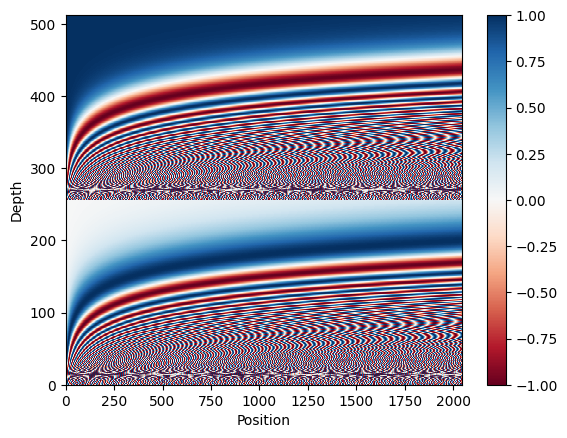

In [16]:
n, d = 2048, 512
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

## 마스킹
- 시퀀스 배치에서 모든 패드 토큰을 마스킹
- 모델이 패딩을 입력으로 취급받지 않도록 함
- 마스크는 패드 값 0이 있는 위치를 나타냄. 해당 위치에서 1을 출력하고 그렇지 않으면 0 출력

In [17]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    
    # add extra dimensions to add the padding
    # to the attention logits
    return seq[:, tf.newaxis, tf.newaxis, :] # (batch_size, 1, 1, seq_len)

In [18]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

- 미리보기 마스크는 시퀀스에서 미래 토큰을 마스킹하는 데 사용됨
- 즉, 마스크는 사용해서는 안 되는 항목을 나타냄
- 즉, 세 번째 토큰을 예측하기 위해 첫 번째와 두 번째 토큰만 사용됨
- 네 번째 토큰을 예측하는 것과 유사하게 첫 번째, 두 번째 및 세 번째 토큰만 사용됨

In [19]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask # (seq_len, seq_len)

In [20]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

## Scaled 내적 어텐션

- 내적 어텐션은 깊이의 제곱근 계수로 조정됨
- 이것은 깊이 값이 크면 내적(dot product)이 큰 크기로 커지기 때문에 softmax 함수로 밀어서 작은 그라디언트가 있는 곳에서 매우 단단한 softmax 생성
<img src = "./image/scaled.png">


- 예를 들어, Q와 K의 평균이 0이고 분산이 1이라고 가정하면, 행렬 곱셈의 평균은 0이고 분산은 dk
- 따라서 dk의 제곱근은 스케일링에 사용되므로 dk값에 관계없이 일관된 분산을 얻음
- 분산이 너무 낮으면 출력이 너무 평평하여 효과적으로 최적화할 수 없음
- 분산이 너무 높으면 softmax가 초기화 시 포화되어 학습하기 어려움


- 마스크에 -1e9를 곱함(음의 무한대에 가까움)
- 마스크가 Q와 K의 스케일된 행렬 곱으로 합산되고 softmax 직전에 적용되기 때문에 수행됨
- 목표는 이러한 셀을 0으로 만드는 것이며 softmax에 대한 큰 음수 입력은 출력해서 거의 0에 가까움

In [21]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k. v must have matching penultimate dimension, i.e. : seq_len_k, seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead)
    but it must be broadcastable for addition.
    
    Args:
      q : query shape == (..., seq_len_q, depth)
      k : key shape == (..., seq_len_k, depth)
      v : value shape == (..., seq_len_v, depth_v)
      mask : Float tensor with shape broadcastable
             to (..., seq_len_q, seq_len_k). Defaults to None.
             
    Returns:
      output, attention_weights
    """
    
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    
    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    
    # add the mask to the scaled tensor
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
        
    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
    
    output = tf.matmul(attention_weights, v) # (..., seq_len_q, depth_v)
    
    return output, attention_weights

- softmax normalization이 K에 대해 수행되면 해당 값에 따라 Q에 부여되는 중요도가 결정됨
- 출력이 주의 가중치와 V(값) 벡터의 곱을 나타냄. 이렇게 하면 집중하려는 토큰이 있는 그대로 유지되고 관련 없는 토큰이 플러시됨

In [22]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
        q, k, v, None)
    print('Attention weights are:')
    print(temp_attn)
    print('Output is:')
    print(temp_out)

In [23]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=tf.float32)  # (4, 2)

# This 'query' aligns with the second 'key',
# so the second 'value' is returned
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [24]:
# This query aligns with a repeated key (third and fourth),
# so all associated values get averaged
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [25]:
temp_q = tf.constant([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


## 멀티 헤드 어텐션

- 멀티 헤드 어텐션의 각 블록은 3개의 입력을 받음
    - Q, K, V
- 이들은 멀티 헤드 어텐션 전에 선형(밀도) 레이어를 통해 배치됨
- (K, Q, V)는 별도의 선형 레이어를 통과함
- 어텐션 기능을 적용하기 전에 출력이 (batch, num_heads, ...) 모양으로 재배열 됨


- 위에서 정의한 scaled_dot_product_attention 함수는 효율성을 위해 브로드캐스트되는 단일 호출에 적용됨
- 어텐션 단계에서는 적절한 마스크를 사용해야 함
- 그런 다음 각 헤드에 대한 어텐션 출력이 연결되고(tf.transpose 및 tf.reshape) 최종 레이어를 통과


- 하나의 어텐션 헤드 대신 Q, K 및 V가 여러 헤드로 분할됨
- 분할 후 각 헤드는 감소된 차원을 가지므로 총 계산 비용은 전체 차원이 있는 단일 헤드 어텐션과 동일

In [26]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
        
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
        
        # scaled_attetion.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
        
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
        return output, attention_weights

- 시도할 MultiHeadAttention 레이어 생성
- 시퀀스의 각 위치 y에서 MultiHeadAttention은 시퀀스의 다른 모든 위치에서 8개의 어텐션 헤드를 모두 실행하여 각 위치에서 동일한 길이의 새 벡터를 반환

In [27]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

## 포인트 와이즈 피드포워드 네트워크
- 포인트 와이즈 피드 포워트 네트워크는 사이에 ReLU 활성화가 있는 두 개의 완전히 연결된 레이어로 구성됨

In [28]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

In [29]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

## 인코더 및 디코더

- 트랜스포머 모델은 표준 시퀀스와 어텐션 모델과 동일한 일반 패턴을 따름
    - 입력 문장은 시퀀스의 각 토큰에 대한 출력을 생성하는 N인코더 계층을 통해 전달됨
    - 디코더는 인코더의 출력과 자체 입력(셀프 어텐션)에 어텐션하여 다음 단어를 예측함

## 인코더 레이어

- 각 인코더 계층은 하위 계층으로 구성됨
    - 멀티 헤드 어텐션(패딩 마스크 포함)
    - 포인트 와이즈 피드포워드 네트워크
- 이러한 각 하위 계층에는 레이어 정규화가 뒤따르는 레지듀얼 커넥션이 있음
- 레지듀얼 커넥션은 심층 네트워크에서 Gradient Vanishing(기울기 소실) 문제를 방지하는 데 도움 됨
- 각 하위 계층의 출력은 LayerNorm(x + Sublayer(x))
- 정규화는 d_model(마지막) 축에서 수행 됨
- 트랜스포머에는 N개의 인코더 레이어가 있음

In [30]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
        
        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
        
        return out2

In [31]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

## 디코더 레이어

- 각 디코더 계층은 하위 계층으로 구성됨
    - 마스킹된 멀티 헤드 어텐션(프리뷰 마스크 및 패딩 마스크 포함)
    - 다중 헤드 어텐션(패딩 마스크 포함). V(값) 및 K(키)는 인코더 출력을 입력으로 받음. Q(쿼리)는 마스크된 다중 헤드 어텐션 하위 계층에서 출력을 수신함
    - 포인트 와이즈 피드포워드 네트워크
    
- 디코더에도 레이어 정규화와 레지듀얼 커넥션 존재하고, N개의 디코더 레이어 존재
- Q는 디코더의 첫 번째 어텐션 블록에서 출력을 수신하고 K는 인코더 출력을 수신하므로 어텐션 가중치는 인코더의 출력을 기반으로 디코더의 입력에 주어진 중요도를 나타냄

In [32]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()
        
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training,
             look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)
        
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)
        
        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
        
        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
        
        return out3, attn_weights_block1, attn_weights_block2

In [33]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

## 인코더
- Encoder는 다음으로 구성됨
    - 입력 임베딩
    - 포지셔널 인코딩
    - N 인코더 레이어
    
- 포지셔널 인코딩과 합산되는 임베딩을 통해 입력 문장이 입력됨
- 이 합산의 출력은 인코더 계층에 대한 입력
- 인코더의 출력은 디코더의 입력

In [34]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.d_model)
        
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        
        seq_len = tf.shape(x)[1]
        
        # adding embedding and position encoding
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
            
        return x  # (batch_size, input_seq_len, d_model)

In [35]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


## 디코더

- Decoder는 다음으로 구성됨
    - 출력 임베딩
    - 포지셔널 인코딩
    - N 디코더 레이어
- 포지셔널 인코딩과 합산되는 임베딩을 통해 배치됨
- 이 합산의 출력은 디코더 계층에 대한 입력
- 디코더의 출력은 최종 선형 레이어에 대한 입력

In [36]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
                 maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
        
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training,
             look_ahead_mask, padding_mask):
        
        seq_len = tf.shape(x)[1]
        attention_weights = {}
        
        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                   look_ahead_mask, padding_mask)
            
            attention_weights[f"decoder_layer{i+1}_block1"] = block1
            attention_weights[f"decoder_layer{i+1}_block2"] = block2
            
        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [37]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              training=False,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

## Transformer 만들기

- Transformer는 인코더, 디코더 및 최종 선형 레이어로 구성됨
- 디코더의 출력은 선형 레이어에 대한 입력이고 출력은 반환됨

In [38]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 target_vocab_size, pe_input, pe_target, rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                               input_vocab_size, pe_input, rate)
        
        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, rate)
        
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
        
    def call(self, inputs, training):
        # Keras models prefer if you pass all your inputs in the first argument
        inp, tar = inputs
        
        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)
        
        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
        
        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        
        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
        
        return final_output, attention_weights
    
    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = create_padding_mask(inp)
        
        # Used in the 2nd attention block in the decoder
        # This padding mask is used to mask the encoder outputs
        dec_padding_mask = create_padding_mask(inp)
        
        # Used in the 1st attention block in the decoder
        # It is used to pad and mask future tokens in the input received by
        # the decoder
        look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
        dec_target_padding_mask = create_padding_mask(tar)
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
        
        return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [39]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=8500, target_vocab_size=8000,
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer([temp_input, temp_target], training=False)
fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

## 하이퍼-파라미터 설정

- 기본 모델은
    - num_layers=6
    - d_model=512
    - dff=2048
- 이 예제에서는 빠르게 모델을 확인하기 위해 값을 줄여서 생성

In [40]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

## 옵티마이저
- 논문에 따라 맞춤형 학습률 스케줄러(Custom Learning Rate Scheduler)와 함께 Adam 사용

In [41]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [42]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

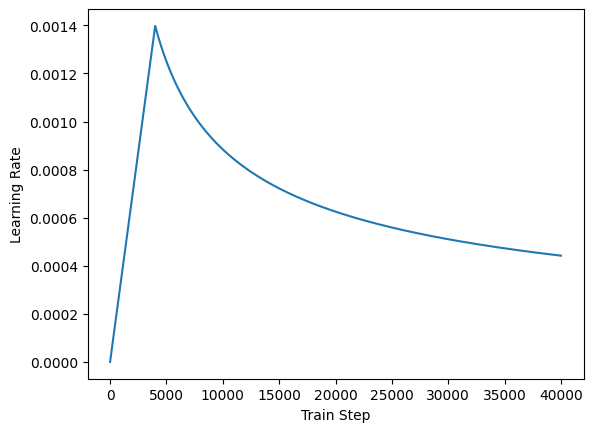

In [43]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## 손실 및 측정항목

In [44]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [45]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [46]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

## 훈련 및 체크포인트

In [47]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.pt.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    pe_input=1000,
    pe_target=1000,
    rate=dropout_rate)

In [48]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

- 타겟은 tar_inp와 tar_real로 나뉨
- tar_inp는 디코더에 대한 입력으로 전달됨. tar_real 은 1만큼 이동한 동일한 입력 
- tar_real 의 각 위치에서 tar_input 은 예측해야 하는 다음 토큰을 포함
- 예를 들어 sentence = "SOS 정글 속의 사자가 EOS를 자고 있다"
- tar_inp = "SOS 정글에서 사자가 자고 있습니다"
- tar_real = "정글의 사자가 잠든 EOS"
- 트랜스포머는 자동 회귀 모델. 트랜스포머는 한 번에 한 부분씩 예측하고 지금까지의 출력을 사용하여 다음에 수행할 작업을 결정
- 훈련 중에 이 예제는 teacher forcing을 사용합니다(예: 텍스트 생성 자습서 ). teacher forcing은 모델이 현재 시간 단계에서 예측하는 것과 상관없이 실제 출력을 다음 시간 단계로 전달
    - teacher forcing은 딥러닝 모델에서 시퀀스(sequence) 데이터를 학습할 때 사용되는 기법 중 하나
    - 시퀀스 데이터란, 시간적 순서를 가지며 연속적으로 발생하는 데이터
    - teacher forcing은 딥러닝 모델이 다음 시퀀스 값을 예측할 때, 이전 시퀀스 값들과 함께 정답 데이터를 입력으로 사용하여 모델이 더 정확하게 예측하도록 하는 방법 (학습 초기 정확도 높이는 데 유리)
    - 과대적합 방지를 위해 일반적으로 학습 초기에 사용하고, 이후에는 점진적으로 푸는 방식으로 사용
- 트랜스포머가 각 토큰을 예측할 때 셀프 어텐션을 통해 입력 시퀀스의 이전 토큰을 보고 다음 토큰을 더 잘 예측할 수 있음
- 모델이 예상 출력을 엿보는 것을 방지하기 위해 모델은 프리뷰 마스크를 사용

In [49]:
EPOCHS = 5

In [50]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    with tf.GradientTape() as tape:
        predictions, _ = transformer([inp, tar_inp],
                                 training = True)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(accuracy_function(tar_real, predictions))

- 포르투갈어가 입력 언어로 사용되고 영어가 대상 언어

In [51]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> portuguese, tar -> english
    for (batch, (inp, tar)) in enumerate(train_batches):
        train_step(inp, tar)

        if batch % 50 == 0:
            print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

        if (epoch + 1) % 5 == 0:
            ckpt_save_path = ckpt_manager.save()
            print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

        print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

        print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 8.8368 Accuracy 0.0000
Epoch 1 Loss 8.8368 Accuracy 0.0000
Time taken for 1 epoch: 18.05 secs

Epoch 1 Loss 8.8399 Accuracy 0.0000
Time taken for 1 epoch: 20.08 secs

Epoch 1 Loss 8.8407 Accuracy 0.0000
Time taken for 1 epoch: 22.54 secs

Epoch 1 Loss 8.8420 Accuracy 0.0000
Time taken for 1 epoch: 24.25 secs

Epoch 1 Loss 8.8433 Accuracy 0.0000
Time taken for 1 epoch: 25.60 secs

Epoch 1 Loss 8.8443 Accuracy 0.0000
Time taken for 1 epoch: 27.08 secs

Epoch 1 Loss 8.8435 Accuracy 0.0000
Time taken for 1 epoch: 28.56 secs

Epoch 1 Loss 8.8437 Accuracy 0.0000
Time taken for 1 epoch: 29.82 secs

Epoch 1 Loss 8.8427 Accuracy 0.0001
Time taken for 1 epoch: 32.67 secs

Epoch 1 Loss 8.8413 Accuracy 0.0001
Time taken for 1 epoch: 35.20 secs

Epoch 1 Loss 8.8398 Accuracy 0.0001
Time taken for 1 epoch: 48.95 secs

Epoch 1 Loss 8.8387 Accuracy 0.0001
Time taken for 1 epoch: 52.31 secs

Epoch 1 Loss 8.8379 Accuracy 0.0001
Time taken for 1 epoch: 57.12 secs

Epoch 1 Loss 8.8378 

Epoch 1 Loss 8.6669 Accuracy 0.0243
Time taken for 1 epoch: 262.88 secs

Epoch 1 Loss 8.6646 Accuracy 0.0245
Time taken for 1 epoch: 264.30 secs

Epoch 1 Loss 8.6624 Accuracy 0.0249
Time taken for 1 epoch: 267.54 secs

Epoch 1 Loss 8.6603 Accuracy 0.0251
Time taken for 1 epoch: 270.46 secs

Epoch 1 Loss 8.6581 Accuracy 0.0253
Time taken for 1 epoch: 271.93 secs

Epoch 1 Loss 8.6558 Accuracy 0.0257
Time taken for 1 epoch: 273.24 secs

Epoch 1 Loss 8.6537 Accuracy 0.0258
Time taken for 1 epoch: 276.99 secs

Epoch 1 Loss 8.6516 Accuracy 0.0259
Time taken for 1 epoch: 279.91 secs

Epoch 1 Loss 8.6494 Accuracy 0.0262
Time taken for 1 epoch: 282.41 secs

Epoch 1 Loss 8.6473 Accuracy 0.0263
Time taken for 1 epoch: 284.36 secs

Epoch 1 Loss 8.6452 Accuracy 0.0263
Time taken for 1 epoch: 285.89 secs

Epoch 1 Loss 8.6432 Accuracy 0.0264
Time taken for 1 epoch: 290.06 secs

Epoch 1 Loss 8.6410 Accuracy 0.0266
Time taken for 1 epoch: 291.72 secs

Epoch 1 Loss 8.6387 Accuracy 0.0268
Time taken for 

Epoch 1 Loss 8.3693 Accuracy 0.0361
Time taken for 1 epoch: 510.48 secs

Epoch 1 Loss 8.3661 Accuracy 0.0361
Time taken for 1 epoch: 512.08 secs

Epoch 1 Loss 8.3627 Accuracy 0.0362
Time taken for 1 epoch: 513.93 secs

Epoch 1 Loss 8.3593 Accuracy 0.0363
Time taken for 1 epoch: 515.05 secs

Epoch 1 Loss 8.3561 Accuracy 0.0363
Time taken for 1 epoch: 516.52 secs

Epoch 1 Loss 8.3528 Accuracy 0.0363
Time taken for 1 epoch: 518.12 secs

Epoch 1 Loss 8.3496 Accuracy 0.0363
Time taken for 1 epoch: 521.70 secs

Epoch 1 Loss 8.3463 Accuracy 0.0363
Time taken for 1 epoch: 524.15 secs

Epoch 1 Loss 8.3428 Accuracy 0.0364
Time taken for 1 epoch: 527.87 secs

Epoch 1 Loss 8.3393 Accuracy 0.0365
Time taken for 1 epoch: 529.25 secs

Epoch 1 Loss 8.3358 Accuracy 0.0366
Time taken for 1 epoch: 531.30 secs

Epoch 1 Loss 8.3323 Accuracy 0.0367
Time taken for 1 epoch: 533.32 secs

Epoch 1 Loss 8.3288 Accuracy 0.0368
Time taken for 1 epoch: 535.09 secs

Epoch 1 Loss 8.3254 Accuracy 0.0369
Time taken for 

Epoch 1 Loss 7.9563 Accuracy 0.0480
Time taken for 1 epoch: 747.00 secs

Epoch 1 Loss 7.9523 Accuracy 0.0482
Time taken for 1 epoch: 748.27 secs

Epoch 1 Loss 7.9485 Accuracy 0.0484
Time taken for 1 epoch: 750.07 secs

Epoch 1 Loss 7.9446 Accuracy 0.0486
Time taken for 1 epoch: 751.96 secs

Epoch 1 Loss 7.9406 Accuracy 0.0487
Time taken for 1 epoch: 754.38 secs

Epoch 1 Loss 7.9369 Accuracy 0.0488
Time taken for 1 epoch: 755.65 secs

Epoch 1 Loss 7.9331 Accuracy 0.0490
Time taken for 1 epoch: 757.59 secs

Epoch 1 Loss 7.9294 Accuracy 0.0491
Time taken for 1 epoch: 759.89 secs

Epoch 1 Loss 7.9256 Accuracy 0.0493
Time taken for 1 epoch: 765.07 secs

Epoch 1 Loss 7.9216 Accuracy 0.0495
Time taken for 1 epoch: 766.89 secs

Epoch 1 Loss 7.9176 Accuracy 0.0496
Time taken for 1 epoch: 768.13 secs

Epoch 1 Loss 7.9137 Accuracy 0.0498
Time taken for 1 epoch: 769.71 secs

Epoch 1 Loss 7.9100 Accuracy 0.0500
Time taken for 1 epoch: 771.91 secs

Epoch 1 Loss 7.9058 Accuracy 0.0501
Time taken for 

Epoch 1 Loss 7.5518 Accuracy 0.0668
Time taken for 1 epoch: 996.46 secs

Epoch 1 Loss 7.5487 Accuracy 0.0669
Time taken for 1 epoch: 998.45 secs

Epoch 1 Loss 7.5457 Accuracy 0.0670
Time taken for 1 epoch: 1000.16 secs

Epoch 1 Loss 7.5428 Accuracy 0.0672
Time taken for 1 epoch: 1002.56 secs

Epoch 1 Loss 7.5398 Accuracy 0.0673
Time taken for 1 epoch: 1005.11 secs

Epoch 1 Loss 7.5368 Accuracy 0.0674
Time taken for 1 epoch: 1006.24 secs

Epoch 1 Batch 450 Loss 7.5338 Accuracy 0.0676
Epoch 1 Loss 7.5338 Accuracy 0.0676
Time taken for 1 epoch: 1008.70 secs

Epoch 1 Loss 7.5306 Accuracy 0.0677
Time taken for 1 epoch: 1010.59 secs

Epoch 1 Loss 7.5273 Accuracy 0.0679
Time taken for 1 epoch: 1011.96 secs

Epoch 1 Loss 7.5243 Accuracy 0.0680
Time taken for 1 epoch: 1015.04 secs

Epoch 1 Loss 7.5215 Accuracy 0.0682
Time taken for 1 epoch: 1017.03 secs

Epoch 1 Loss 7.5182 Accuracy 0.0684
Time taken for 1 epoch: 1019.62 secs

Epoch 1 Loss 7.5152 Accuracy 0.0685
Time taken for 1 epoch: 1021.32 

Epoch 1 Loss 7.2447 Accuracy 0.0832
Time taken for 1 epoch: 1252.25 secs

Epoch 1 Loss 7.2423 Accuracy 0.0834
Time taken for 1 epoch: 1255.74 secs

Epoch 1 Loss 7.2399 Accuracy 0.0835
Time taken for 1 epoch: 1257.65 secs

Epoch 1 Loss 7.2374 Accuracy 0.0837
Time taken for 1 epoch: 1259.53 secs

Epoch 1 Loss 7.2343 Accuracy 0.0839
Time taken for 1 epoch: 1262.10 secs

Epoch 1 Loss 7.2316 Accuracy 0.0840
Time taken for 1 epoch: 1264.01 secs

Epoch 1 Loss 7.2288 Accuracy 0.0842
Time taken for 1 epoch: 1265.91 secs

Epoch 1 Loss 7.2264 Accuracy 0.0843
Time taken for 1 epoch: 1267.22 secs

Epoch 1 Loss 7.2238 Accuracy 0.0845
Time taken for 1 epoch: 1269.64 secs

Epoch 1 Loss 7.2209 Accuracy 0.0847
Time taken for 1 epoch: 1271.15 secs

Epoch 1 Loss 7.2185 Accuracy 0.0848
Time taken for 1 epoch: 1273.77 secs

Epoch 1 Loss 7.2161 Accuracy 0.0849
Time taken for 1 epoch: 1276.06 secs

Epoch 1 Loss 7.2137 Accuracy 0.0851
Time taken for 1 epoch: 1277.69 secs

Epoch 1 Loss 7.2114 Accuracy 0.0852
Ti

Epoch 1 Loss 6.9793 Accuracy 0.0997
Time taken for 1 epoch: 1502.00 secs

Epoch 1 Loss 6.9770 Accuracy 0.0998
Time taken for 1 epoch: 1504.80 secs

Epoch 1 Loss 6.9749 Accuracy 0.0999
Time taken for 1 epoch: 1506.26 secs

Epoch 1 Loss 6.9729 Accuracy 0.1000
Time taken for 1 epoch: 1509.42 secs

Epoch 1 Loss 6.9708 Accuracy 0.1002
Time taken for 1 epoch: 1511.10 secs

Epoch 1 Loss 6.9687 Accuracy 0.1003
Time taken for 1 epoch: 1513.66 secs

Epoch 1 Loss 6.9662 Accuracy 0.1004
Time taken for 1 epoch: 1517.42 secs

Epoch 1 Loss 6.9641 Accuracy 0.1006
Time taken for 1 epoch: 1519.54 secs

Epoch 1 Loss 6.9620 Accuracy 0.1007
Time taken for 1 epoch: 1520.99 secs

Epoch 1 Loss 6.9602 Accuracy 0.1008
Time taken for 1 epoch: 1523.87 secs

Epoch 1 Loss 6.9580 Accuracy 0.1010
Time taken for 1 epoch: 1527.70 secs

Epoch 1 Loss 6.9561 Accuracy 0.1011
Time taken for 1 epoch: 1531.25 secs

Epoch 1 Loss 6.9539 Accuracy 0.1012
Time taken for 1 epoch: 1536.71 secs

Epoch 1 Loss 6.9516 Accuracy 0.1014
Ti

Epoch 1 Loss 6.7543 Accuracy 0.1136
Time taken for 1 epoch: 1749.75 secs

Epoch 1 Loss 6.7522 Accuracy 0.1137
Time taken for 1 epoch: 1751.95 secs

Epoch 1 Loss 6.7503 Accuracy 0.1139
Time taken for 1 epoch: 1753.02 secs

Epoch 1 Loss 6.7485 Accuracy 0.1140
Time taken for 1 epoch: 1755.56 secs

Epoch 1 Loss 6.7465 Accuracy 0.1141
Time taken for 1 epoch: 1757.67 secs

Epoch 1 Loss 6.7446 Accuracy 0.1142
Time taken for 1 epoch: 1760.66 secs

Epoch 1 Loss 6.7428 Accuracy 0.1144
Time taken for 1 epoch: 1762.16 secs

Epoch 1 Loss 6.7411 Accuracy 0.1145
Time taken for 1 epoch: 1764.62 secs

Epoch 1 Loss 6.7393 Accuracy 0.1146
Time taken for 1 epoch: 1766.26 secs

Epoch 1 Loss 6.7376 Accuracy 0.1147
Time taken for 1 epoch: 1770.07 secs

Epoch 1 Loss 6.7356 Accuracy 0.1148
Time taken for 1 epoch: 1773.93 secs

Epoch 1 Loss 6.7338 Accuracy 0.1149
Time taken for 1 epoch: 1776.16 secs

Epoch 1 Loss 6.7319 Accuracy 0.1150
Time taken for 1 epoch: 1777.92 secs

Epoch 1 Loss 6.7299 Accuracy 0.1152
Ti

Epoch 2 Loss 5.1658 Accuracy 0.2209
Time taken for 1 epoch: 163.43 secs

Epoch 2 Loss 5.1644 Accuracy 0.2211
Time taken for 1 epoch: 165.15 secs

Epoch 2 Loss 5.1625 Accuracy 0.2214
Time taken for 1 epoch: 166.18 secs

Epoch 2 Loss 5.1622 Accuracy 0.2213
Time taken for 1 epoch: 168.76 secs

Epoch 2 Loss 5.1616 Accuracy 0.2216
Time taken for 1 epoch: 170.23 secs

Epoch 2 Loss 5.1627 Accuracy 0.2212
Time taken for 1 epoch: 172.52 secs

Epoch 2 Loss 5.1618 Accuracy 0.2214
Time taken for 1 epoch: 173.81 secs

Epoch 2 Loss 5.1626 Accuracy 0.2214
Time taken for 1 epoch: 175.73 secs

Epoch 2 Loss 5.1621 Accuracy 0.2214
Time taken for 1 epoch: 177.79 secs

Epoch 2 Loss 5.1624 Accuracy 0.2215
Time taken for 1 epoch: 179.89 secs

Epoch 2 Loss 5.1631 Accuracy 0.2213
Time taken for 1 epoch: 181.95 secs

Epoch 2 Loss 5.1646 Accuracy 0.2213
Time taken for 1 epoch: 185.12 secs

Epoch 2 Loss 5.1640 Accuracy 0.2216
Time taken for 1 epoch: 187.89 secs

Epoch 2 Loss 5.1652 Accuracy 0.2214
Time taken for 

Epoch 2 Loss 5.1241 Accuracy 0.2251
Time taken for 1 epoch: 391.95 secs

Epoch 2 Loss 5.1226 Accuracy 0.2252
Time taken for 1 epoch: 393.17 secs

Epoch 2 Loss 5.1222 Accuracy 0.2253
Time taken for 1 epoch: 394.27 secs

Epoch 2 Loss 5.1218 Accuracy 0.2253
Time taken for 1 epoch: 396.40 secs

Epoch 2 Loss 5.1217 Accuracy 0.2254
Time taken for 1 epoch: 398.39 secs

Epoch 2 Loss 5.1218 Accuracy 0.2254
Time taken for 1 epoch: 399.91 secs

Epoch 2 Loss 5.1222 Accuracy 0.2253
Time taken for 1 epoch: 401.83 secs

Epoch 2 Loss 5.1216 Accuracy 0.2253
Time taken for 1 epoch: 404.30 secs

Epoch 2 Loss 5.1214 Accuracy 0.2254
Time taken for 1 epoch: 405.84 secs

Epoch 2 Loss 5.1194 Accuracy 0.2256
Time taken for 1 epoch: 408.44 secs

Epoch 2 Loss 5.1195 Accuracy 0.2255
Time taken for 1 epoch: 410.12 secs

Epoch 2 Loss 5.1190 Accuracy 0.2256
Time taken for 1 epoch: 421.11 secs

Epoch 2 Loss 5.1177 Accuracy 0.2257
Time taken for 1 epoch: 422.49 secs

Epoch 2 Loss 5.1170 Accuracy 0.2258
Time taken for 

Epoch 2 Loss 5.0765 Accuracy 0.2296
Time taken for 1 epoch: 624.90 secs

Epoch 2 Loss 5.0765 Accuracy 0.2296
Time taken for 1 epoch: 627.04 secs

Epoch 2 Loss 5.0761 Accuracy 0.2296
Time taken for 1 epoch: 631.16 secs

Epoch 2 Loss 5.0753 Accuracy 0.2297
Time taken for 1 epoch: 633.87 secs

Epoch 2 Batch 300 Loss 5.0754 Accuracy 0.2297
Epoch 2 Loss 5.0754 Accuracy 0.2297
Time taken for 1 epoch: 636.16 secs

Epoch 2 Loss 5.0750 Accuracy 0.2297
Time taken for 1 epoch: 638.30 secs

Epoch 2 Loss 5.0744 Accuracy 0.2297
Time taken for 1 epoch: 640.65 secs

Epoch 2 Loss 5.0739 Accuracy 0.2298
Time taken for 1 epoch: 643.30 secs

Epoch 2 Loss 5.0737 Accuracy 0.2297
Time taken for 1 epoch: 645.97 secs

Epoch 2 Loss 5.0735 Accuracy 0.2297
Time taken for 1 epoch: 647.21 secs

Epoch 2 Loss 5.0727 Accuracy 0.2298
Time taken for 1 epoch: 649.57 secs

Epoch 2 Loss 5.0718 Accuracy 0.2299
Time taken for 1 epoch: 651.19 secs

Epoch 2 Loss 5.0719 Accuracy 0.2298
Time taken for 1 epoch: 653.01 secs

Epoch

Epoch 2 Loss 5.0264 Accuracy 0.2347
Time taken for 1 epoch: 880.65 secs

Epoch 2 Loss 5.0258 Accuracy 0.2348
Time taken for 1 epoch: 882.77 secs

Epoch 2 Loss 5.0249 Accuracy 0.2349
Time taken for 1 epoch: 886.93 secs

Epoch 2 Loss 5.0246 Accuracy 0.2350
Time taken for 1 epoch: 888.87 secs

Epoch 2 Loss 5.0241 Accuracy 0.2350
Time taken for 1 epoch: 891.80 secs

Epoch 2 Loss 5.0237 Accuracy 0.2350
Time taken for 1 epoch: 893.31 secs

Epoch 2 Loss 5.0232 Accuracy 0.2350
Time taken for 1 epoch: 895.07 secs

Epoch 2 Loss 5.0227 Accuracy 0.2351
Time taken for 1 epoch: 897.26 secs

Epoch 2 Loss 5.0219 Accuracy 0.2352
Time taken for 1 epoch: 900.84 secs

Epoch 2 Loss 5.0211 Accuracy 0.2353
Time taken for 1 epoch: 902.12 secs

Epoch 2 Loss 5.0210 Accuracy 0.2353
Time taken for 1 epoch: 904.43 secs

Epoch 2 Loss 5.0203 Accuracy 0.2353
Time taken for 1 epoch: 906.26 secs

Epoch 2 Loss 5.0203 Accuracy 0.2353
Time taken for 1 epoch: 908.12 secs

Epoch 2 Loss 5.0198 Accuracy 0.2354
Time taken for 

Epoch 2 Loss 4.9832 Accuracy 0.2388
Time taken for 1 epoch: 1141.69 secs

Epoch 2 Loss 4.9830 Accuracy 0.2388
Time taken for 1 epoch: 1143.42 secs

Epoch 2 Loss 4.9823 Accuracy 0.2389
Time taken for 1 epoch: 1145.10 secs

Epoch 2 Loss 4.9818 Accuracy 0.2389
Time taken for 1 epoch: 1147.72 secs

Epoch 2 Loss 4.9814 Accuracy 0.2390
Time taken for 1 epoch: 1149.04 secs

Epoch 2 Loss 4.9809 Accuracy 0.2390
Time taken for 1 epoch: 1151.15 secs

Epoch 2 Loss 4.9805 Accuracy 0.2390
Time taken for 1 epoch: 1153.12 secs

Epoch 2 Loss 4.9799 Accuracy 0.2391
Time taken for 1 epoch: 1154.50 secs

Epoch 2 Loss 4.9800 Accuracy 0.2391
Time taken for 1 epoch: 1159.11 secs

Epoch 2 Loss 4.9793 Accuracy 0.2391
Time taken for 1 epoch: 1172.52 secs

Epoch 2 Loss 4.9788 Accuracy 0.2392
Time taken for 1 epoch: 1173.90 secs

Epoch 2 Loss 4.9782 Accuracy 0.2393
Time taken for 1 epoch: 1175.40 secs

Epoch 2 Loss 4.9776 Accuracy 0.2393
Time taken for 1 epoch: 1176.34 secs

Epoch 2 Loss 4.9770 Accuracy 0.2394
Ti

Epoch 2 Loss 4.9435 Accuracy 0.2423
Time taken for 1 epoch: 1392.62 secs

Epoch 2 Loss 4.9432 Accuracy 0.2423
Time taken for 1 epoch: 1396.27 secs

Epoch 2 Loss 4.9427 Accuracy 0.2423
Time taken for 1 epoch: 1397.71 secs

Epoch 2 Loss 4.9424 Accuracy 0.2423
Time taken for 1 epoch: 1401.62 secs

Epoch 2 Loss 4.9421 Accuracy 0.2424
Time taken for 1 epoch: 1403.77 secs

Epoch 2 Loss 4.9419 Accuracy 0.2424
Time taken for 1 epoch: 1405.20 secs

Epoch 2 Loss 4.9415 Accuracy 0.2424
Time taken for 1 epoch: 1409.44 secs

Epoch 2 Loss 4.9416 Accuracy 0.2424
Time taken for 1 epoch: 1411.94 secs

Epoch 2 Loss 4.9410 Accuracy 0.2425
Time taken for 1 epoch: 1416.06 secs

Epoch 2 Loss 4.9403 Accuracy 0.2425
Time taken for 1 epoch: 1418.38 secs

Epoch 2 Loss 4.9399 Accuracy 0.2426
Time taken for 1 epoch: 1419.76 secs

Epoch 2 Loss 4.9392 Accuracy 0.2426
Time taken for 1 epoch: 1421.43 secs

Epoch 2 Loss 4.9392 Accuracy 0.2426
Time taken for 1 epoch: 1424.88 secs

Epoch 2 Loss 4.9387 Accuracy 0.2427
Ti

Epoch 2 Loss 4.9028 Accuracy 0.2459
Time taken for 1 epoch: 1647.30 secs

Epoch 2 Loss 4.9025 Accuracy 0.2459
Time taken for 1 epoch: 1648.65 secs

Epoch 2 Loss 4.9019 Accuracy 0.2460
Time taken for 1 epoch: 1650.79 secs

Epoch 2 Loss 4.9017 Accuracy 0.2460
Time taken for 1 epoch: 1653.15 secs

Epoch 2 Loss 4.9015 Accuracy 0.2460
Time taken for 1 epoch: 1656.21 secs

Epoch 2 Loss 4.9014 Accuracy 0.2460
Time taken for 1 epoch: 1657.63 secs

Epoch 2 Loss 4.9014 Accuracy 0.2460
Time taken for 1 epoch: 1658.91 secs

Epoch 2 Loss 4.9009 Accuracy 0.2460
Time taken for 1 epoch: 1662.70 secs

Epoch 2 Loss 4.9007 Accuracy 0.2460
Time taken for 1 epoch: 1664.33 secs

Epoch 2 Loss 4.9003 Accuracy 0.2461
Time taken for 1 epoch: 1665.55 secs

Epoch 2 Loss 4.9000 Accuracy 0.2461
Time taken for 1 epoch: 1667.59 secs

Epoch 2 Loss 4.8998 Accuracy 0.2461
Time taken for 1 epoch: 1669.36 secs

Epoch 2 Batch 750 Loss 4.8994 Accuracy 0.2462
Epoch 2 Loss 4.8994 Accuracy 0.2462
Time taken for 1 epoch: 1671.3

Epoch 3 Loss 4.5945 Accuracy 0.2707
Time taken for 1 epoch: 80.33 secs

Epoch 3 Loss 4.5908 Accuracy 0.2710
Time taken for 1 epoch: 82.37 secs

Epoch 3 Loss 4.5955 Accuracy 0.2706
Time taken for 1 epoch: 83.78 secs

Epoch 3 Loss 4.5953 Accuracy 0.2704
Time taken for 1 epoch: 86.10 secs

Epoch 3 Loss 4.5997 Accuracy 0.2698
Time taken for 1 epoch: 88.50 secs

Epoch 3 Loss 4.6006 Accuracy 0.2698
Time taken for 1 epoch: 92.35 secs

Epoch 3 Loss 4.6007 Accuracy 0.2698
Time taken for 1 epoch: 94.04 secs

Epoch 3 Loss 4.6034 Accuracy 0.2694
Time taken for 1 epoch: 95.45 secs

Epoch 3 Loss 4.6032 Accuracy 0.2691
Time taken for 1 epoch: 100.89 secs

Epoch 3 Loss 4.6054 Accuracy 0.2690
Time taken for 1 epoch: 102.57 secs

Epoch 3 Loss 4.6032 Accuracy 0.2692
Time taken for 1 epoch: 104.03 secs

Epoch 3 Loss 4.6023 Accuracy 0.2695
Time taken for 1 epoch: 106.20 secs

Epoch 3 Batch 50 Loss 4.5989 Accuracy 0.2701
Epoch 3 Loss 4.5989 Accuracy 0.2701
Time taken for 1 epoch: 108.52 secs

Epoch 3 Loss 4

Epoch 3 Batch 150 Loss 4.5704 Accuracy 0.2713
Epoch 3 Loss 4.5704 Accuracy 0.2713
Time taken for 1 epoch: 338.98 secs

Epoch 3 Loss 4.5709 Accuracy 0.2713
Time taken for 1 epoch: 340.65 secs

Epoch 3 Loss 4.5710 Accuracy 0.2713
Time taken for 1 epoch: 343.82 secs

Epoch 3 Loss 4.5699 Accuracy 0.2715
Time taken for 1 epoch: 345.20 secs

Epoch 3 Loss 4.5710 Accuracy 0.2715
Time taken for 1 epoch: 346.54 secs

Epoch 3 Loss 4.5702 Accuracy 0.2716
Time taken for 1 epoch: 347.68 secs

Epoch 3 Loss 4.5694 Accuracy 0.2717
Time taken for 1 epoch: 349.28 secs

Epoch 3 Loss 4.5696 Accuracy 0.2716
Time taken for 1 epoch: 352.02 secs

Epoch 3 Loss 4.5686 Accuracy 0.2718
Time taken for 1 epoch: 354.12 secs

Epoch 3 Loss 4.5675 Accuracy 0.2719
Time taken for 1 epoch: 355.49 secs

Epoch 3 Loss 4.5685 Accuracy 0.2719
Time taken for 1 epoch: 357.41 secs

Epoch 3 Loss 4.5691 Accuracy 0.2718
Time taken for 1 epoch: 358.88 secs

Epoch 3 Loss 4.5689 Accuracy 0.2719
Time taken for 1 epoch: 361.50 secs

Epoch

Epoch 3 Loss 4.5419 Accuracy 0.2758
Time taken for 1 epoch: 569.19 secs

Epoch 3 Loss 4.5415 Accuracy 0.2759
Time taken for 1 epoch: 570.63 secs

Epoch 3 Loss 4.5420 Accuracy 0.2758
Time taken for 1 epoch: 572.60 secs

Epoch 3 Loss 4.5416 Accuracy 0.2759
Time taken for 1 epoch: 574.39 secs

Epoch 3 Loss 4.5409 Accuracy 0.2760
Time taken for 1 epoch: 579.01 secs

Epoch 3 Loss 4.5398 Accuracy 0.2761
Time taken for 1 epoch: 580.68 secs

Epoch 3 Loss 4.5400 Accuracy 0.2761
Time taken for 1 epoch: 584.38 secs

Epoch 3 Loss 4.5400 Accuracy 0.2762
Time taken for 1 epoch: 586.84 secs

Epoch 3 Loss 4.5398 Accuracy 0.2762
Time taken for 1 epoch: 589.70 secs

Epoch 3 Loss 4.5401 Accuracy 0.2762
Time taken for 1 epoch: 591.26 secs

Epoch 3 Loss 4.5402 Accuracy 0.2762
Time taken for 1 epoch: 592.63 secs

Epoch 3 Loss 4.5394 Accuracy 0.2763
Time taken for 1 epoch: 593.87 secs

Epoch 3 Loss 4.5391 Accuracy 0.2764
Time taken for 1 epoch: 595.90 secs

Epoch 3 Loss 4.5391 Accuracy 0.2764
Time taken for 

Epoch 3 Loss 4.5070 Accuracy 0.2802
Time taken for 1 epoch: 814.69 secs

Epoch 3 Loss 4.5070 Accuracy 0.2802
Time taken for 1 epoch: 817.03 secs

Epoch 3 Loss 4.5062 Accuracy 0.2802
Time taken for 1 epoch: 819.89 secs

Epoch 3 Loss 4.5057 Accuracy 0.2803
Time taken for 1 epoch: 822.08 secs

Epoch 3 Loss 4.5055 Accuracy 0.2803
Time taken for 1 epoch: 824.43 secs

Epoch 3 Loss 4.5054 Accuracy 0.2803
Time taken for 1 epoch: 827.07 secs

Epoch 3 Loss 4.5053 Accuracy 0.2803
Time taken for 1 epoch: 838.17 secs

Epoch 3 Loss 4.5049 Accuracy 0.2804
Time taken for 1 epoch: 841.06 secs

Epoch 3 Loss 4.5042 Accuracy 0.2804
Time taken for 1 epoch: 842.66 secs

Epoch 3 Loss 4.5041 Accuracy 0.2805
Time taken for 1 epoch: 844.62 secs

Epoch 3 Loss 4.5038 Accuracy 0.2805
Time taken for 1 epoch: 846.18 secs

Epoch 3 Loss 4.5035 Accuracy 0.2805
Time taken for 1 epoch: 847.43 secs

Epoch 3 Loss 4.5030 Accuracy 0.2805
Time taken for 1 epoch: 849.39 secs

Epoch 3 Loss 4.5023 Accuracy 0.2806
Time taken for 

Epoch 3 Loss 4.4685 Accuracy 0.2845
Time taken for 1 epoch: 1070.52 secs

Epoch 3 Loss 4.4688 Accuracy 0.2845
Time taken for 1 epoch: 1072.37 secs

Epoch 3 Loss 4.4681 Accuracy 0.2846
Time taken for 1 epoch: 1073.88 secs

Epoch 3 Loss 4.4674 Accuracy 0.2846
Time taken for 1 epoch: 1075.34 secs

Epoch 3 Loss 4.4668 Accuracy 0.2847
Time taken for 1 epoch: 1076.28 secs

Epoch 3 Loss 4.4666 Accuracy 0.2848
Time taken for 1 epoch: 1078.48 secs

Epoch 3 Loss 4.4663 Accuracy 0.2848
Time taken for 1 epoch: 1080.70 secs

Epoch 3 Loss 4.4656 Accuracy 0.2849
Time taken for 1 epoch: 1082.44 secs

Epoch 3 Loss 4.4657 Accuracy 0.2849
Time taken for 1 epoch: 1084.58 secs

Epoch 3 Loss 4.4658 Accuracy 0.2849
Time taken for 1 epoch: 1086.47 secs

Epoch 3 Loss 4.4653 Accuracy 0.2849
Time taken for 1 epoch: 1088.14 secs

Epoch 3 Loss 4.4647 Accuracy 0.2850
Time taken for 1 epoch: 1090.23 secs

Epoch 3 Loss 4.4645 Accuracy 0.2850
Time taken for 1 epoch: 1091.53 secs

Epoch 3 Loss 4.4643 Accuracy 0.2850
Ti

Epoch 3 Loss 4.4351 Accuracy 0.2885
Time taken for 1 epoch: 1332.97 secs

Epoch 3 Loss 4.4345 Accuracy 0.2886
Time taken for 1 epoch: 1336.59 secs

Epoch 3 Loss 4.4344 Accuracy 0.2886
Time taken for 1 epoch: 1337.83 secs

Epoch 3 Loss 4.4339 Accuracy 0.2886
Time taken for 1 epoch: 1341.10 secs

Epoch 3 Loss 4.4337 Accuracy 0.2887
Time taken for 1 epoch: 1343.51 secs

Epoch 3 Loss 4.4332 Accuracy 0.2887
Time taken for 1 epoch: 1345.00 secs

Epoch 3 Loss 4.4329 Accuracy 0.2888
Time taken for 1 epoch: 1346.84 secs

Epoch 3 Batch 600 Loss 4.4327 Accuracy 0.2888
Epoch 3 Loss 4.4327 Accuracy 0.2888
Time taken for 1 epoch: 1349.14 secs

Epoch 3 Loss 4.4323 Accuracy 0.2889
Time taken for 1 epoch: 1350.92 secs

Epoch 3 Loss 4.4320 Accuracy 0.2889
Time taken for 1 epoch: 1352.17 secs

Epoch 3 Loss 4.4319 Accuracy 0.2889
Time taken for 1 epoch: 1354.10 secs

Epoch 3 Loss 4.4319 Accuracy 0.2889
Time taken for 1 epoch: 1355.44 secs

Epoch 3 Loss 4.4315 Accuracy 0.2890
Time taken for 1 epoch: 1357.7

Epoch 3 Loss 4.3988 Accuracy 0.2931
Time taken for 1 epoch: 1571.95 secs

Epoch 3 Loss 4.3982 Accuracy 0.2932
Time taken for 1 epoch: 1573.15 secs

Epoch 3 Loss 4.3980 Accuracy 0.2932
Time taken for 1 epoch: 1575.38 secs

Epoch 3 Loss 4.3976 Accuracy 0.2933
Time taken for 1 epoch: 1577.39 secs

Epoch 3 Loss 4.3973 Accuracy 0.2933
Time taken for 1 epoch: 1578.65 secs

Epoch 3 Loss 4.3969 Accuracy 0.2933
Time taken for 1 epoch: 1579.75 secs

Epoch 3 Loss 4.3965 Accuracy 0.2934
Time taken for 1 epoch: 1582.52 secs

Epoch 3 Loss 4.3962 Accuracy 0.2934
Time taken for 1 epoch: 1583.96 secs

Epoch 3 Loss 4.3958 Accuracy 0.2935
Time taken for 1 epoch: 1587.56 secs

Epoch 3 Loss 4.3958 Accuracy 0.2934
Time taken for 1 epoch: 1590.90 secs

Epoch 3 Loss 4.3952 Accuracy 0.2935
Time taken for 1 epoch: 1592.30 secs

Epoch 3 Loss 4.3948 Accuracy 0.2936
Time taken for 1 epoch: 1593.99 secs

Epoch 3 Loss 4.3943 Accuracy 0.2936
Time taken for 1 epoch: 1596.81 secs

Epoch 3 Loss 4.3937 Accuracy 0.2937
Ti

Epoch 4 Loss 4.0732 Accuracy 0.3314
Time taken for 1 epoch: 3.76 secs

Epoch 4 Loss 4.0734 Accuracy 0.3293
Time taken for 1 epoch: 5.61 secs

Epoch 4 Loss 4.0468 Accuracy 0.3351
Time taken for 1 epoch: 7.29 secs

Epoch 4 Loss 4.0870 Accuracy 0.3307
Time taken for 1 epoch: 9.05 secs

Epoch 4 Loss 4.1063 Accuracy 0.3299
Time taken for 1 epoch: 11.39 secs

Epoch 4 Loss 4.0722 Accuracy 0.3302
Time taken for 1 epoch: 13.16 secs

Epoch 4 Loss 4.0819 Accuracy 0.3317
Time taken for 1 epoch: 14.57 secs

Epoch 4 Loss 4.0809 Accuracy 0.3322
Time taken for 1 epoch: 16.00 secs

Epoch 4 Loss 4.0878 Accuracy 0.3289
Time taken for 1 epoch: 17.89 secs

Epoch 4 Loss 4.0786 Accuracy 0.3283
Time taken for 1 epoch: 19.59 secs

Epoch 4 Loss 4.0726 Accuracy 0.3298
Time taken for 1 epoch: 22.30 secs

Epoch 4 Loss 4.0605 Accuracy 0.3304
Time taken for 1 epoch: 24.06 secs

Epoch 4 Loss 4.0535 Accuracy 0.3314
Time taken for 1 epoch: 25.25 secs

Epoch 4 Loss 4.0393 Accuracy 0.3337
Time taken for 1 epoch: 27.20 se

Epoch 4 Loss 4.0253 Accuracy 0.3356
Time taken for 1 epoch: 264.38 secs

Epoch 4 Loss 4.0258 Accuracy 0.3355
Time taken for 1 epoch: 266.08 secs

Epoch 4 Loss 4.0260 Accuracy 0.3356
Time taken for 1 epoch: 268.22 secs

Epoch 4 Loss 4.0262 Accuracy 0.3355
Time taken for 1 epoch: 269.57 secs

Epoch 4 Loss 4.0271 Accuracy 0.3353
Time taken for 1 epoch: 271.10 secs

Epoch 4 Loss 4.0247 Accuracy 0.3356
Time taken for 1 epoch: 272.53 secs

Epoch 4 Loss 4.0249 Accuracy 0.3355
Time taken for 1 epoch: 276.86 secs

Epoch 4 Loss 4.0241 Accuracy 0.3356
Time taken for 1 epoch: 278.09 secs

Epoch 4 Loss 4.0232 Accuracy 0.3356
Time taken for 1 epoch: 280.01 secs

Epoch 4 Loss 4.0227 Accuracy 0.3357
Time taken for 1 epoch: 282.21 secs

Epoch 4 Loss 4.0217 Accuracy 0.3358
Time taken for 1 epoch: 284.32 secs

Epoch 4 Loss 4.0225 Accuracy 0.3358
Time taken for 1 epoch: 286.96 secs

Epoch 4 Loss 4.0202 Accuracy 0.3362
Time taken for 1 epoch: 288.67 secs

Epoch 4 Loss 4.0178 Accuracy 0.3364
Time taken for 

Epoch 4 Loss 3.9864 Accuracy 0.3409
Time taken for 1 epoch: 516.64 secs

Epoch 4 Loss 3.9872 Accuracy 0.3409
Time taken for 1 epoch: 518.85 secs

Epoch 4 Loss 3.9875 Accuracy 0.3408
Time taken for 1 epoch: 521.29 secs

Epoch 4 Loss 3.9871 Accuracy 0.3409
Time taken for 1 epoch: 522.71 secs

Epoch 4 Loss 3.9868 Accuracy 0.3409
Time taken for 1 epoch: 526.69 secs

Epoch 4 Loss 3.9873 Accuracy 0.3409
Time taken for 1 epoch: 528.08 secs

Epoch 4 Loss 3.9876 Accuracy 0.3408
Time taken for 1 epoch: 529.71 secs

Epoch 4 Loss 3.9865 Accuracy 0.3409
Time taken for 1 epoch: 530.76 secs

Epoch 4 Loss 3.9863 Accuracy 0.3410
Time taken for 1 epoch: 533.02 secs

Epoch 4 Loss 3.9862 Accuracy 0.3410
Time taken for 1 epoch: 534.87 secs

Epoch 4 Loss 3.9864 Accuracy 0.3410
Time taken for 1 epoch: 536.97 secs

Epoch 4 Loss 3.9868 Accuracy 0.3410
Time taken for 1 epoch: 540.19 secs

Epoch 4 Loss 3.9866 Accuracy 0.3410
Time taken for 1 epoch: 541.80 secs

Epoch 4 Loss 3.9862 Accuracy 0.3411
Time taken for 

Epoch 4 Loss 3.9573 Accuracy 0.3453
Time taken for 1 epoch: 747.92 secs

Epoch 4 Loss 3.9567 Accuracy 0.3454
Time taken for 1 epoch: 749.31 secs

Epoch 4 Loss 3.9565 Accuracy 0.3454
Time taken for 1 epoch: 751.19 secs

Epoch 4 Loss 3.9559 Accuracy 0.3455
Time taken for 1 epoch: 752.98 secs

Epoch 4 Loss 3.9558 Accuracy 0.3455
Time taken for 1 epoch: 754.21 secs

Epoch 4 Loss 3.9556 Accuracy 0.3456
Time taken for 1 epoch: 756.06 secs

Epoch 4 Loss 3.9549 Accuracy 0.3457
Time taken for 1 epoch: 759.82 secs

Epoch 4 Loss 3.9541 Accuracy 0.3458
Time taken for 1 epoch: 761.54 secs

Epoch 4 Loss 3.9538 Accuracy 0.3458
Time taken for 1 epoch: 763.33 secs

Epoch 4 Loss 3.9540 Accuracy 0.3458
Time taken for 1 epoch: 765.15 secs

Epoch 4 Loss 3.9535 Accuracy 0.3459
Time taken for 1 epoch: 767.50 secs

Epoch 4 Loss 3.9533 Accuracy 0.3459
Time taken for 1 epoch: 770.92 secs

Epoch 4 Loss 3.9528 Accuracy 0.3460
Time taken for 1 epoch: 772.58 secs

Epoch 4 Loss 3.9523 Accuracy 0.3460
Time taken for 

Epoch 4 Loss 3.9172 Accuracy 0.3507
Time taken for 1 epoch: 996.52 secs

Epoch 4 Loss 3.9163 Accuracy 0.3507
Time taken for 1 epoch: 998.41 secs

Epoch 4 Loss 3.9166 Accuracy 0.3507
Time taken for 1 epoch: 1000.22 secs

Epoch 4 Loss 3.9162 Accuracy 0.3508
Time taken for 1 epoch: 1002.42 secs

Epoch 4 Batch 450 Loss 3.9162 Accuracy 0.3508
Epoch 4 Loss 3.9162 Accuracy 0.3508
Time taken for 1 epoch: 1004.14 secs

Epoch 4 Loss 3.9159 Accuracy 0.3508
Time taken for 1 epoch: 1007.73 secs

Epoch 4 Loss 3.9158 Accuracy 0.3508
Time taken for 1 epoch: 1008.94 secs

Epoch 4 Loss 3.9154 Accuracy 0.3509
Time taken for 1 epoch: 1021.78 secs

Epoch 4 Loss 3.9153 Accuracy 0.3509
Time taken for 1 epoch: 1023.82 secs

Epoch 4 Loss 3.9148 Accuracy 0.3510
Time taken for 1 epoch: 1025.52 secs

Epoch 4 Loss 3.9145 Accuracy 0.3510
Time taken for 1 epoch: 1028.14 secs

Epoch 4 Loss 3.9142 Accuracy 0.3510
Time taken for 1 epoch: 1030.18 secs

Epoch 4 Loss 3.9138 Accuracy 0.3511
Time taken for 1 epoch: 1032.63 

Epoch 4 Loss 3.8918 Accuracy 0.3536
Time taken for 1 epoch: 1240.75 secs

Epoch 4 Loss 3.8917 Accuracy 0.3535
Time taken for 1 epoch: 1244.16 secs

Epoch 4 Loss 3.8915 Accuracy 0.3536
Time taken for 1 epoch: 1245.48 secs

Epoch 4 Loss 3.8912 Accuracy 0.3537
Time taken for 1 epoch: 1246.74 secs

Epoch 4 Loss 3.8906 Accuracy 0.3538
Time taken for 1 epoch: 1248.56 secs

Epoch 4 Loss 3.8903 Accuracy 0.3538
Time taken for 1 epoch: 1250.78 secs

Epoch 4 Loss 3.8902 Accuracy 0.3538
Time taken for 1 epoch: 1252.96 secs

Epoch 4 Loss 3.8898 Accuracy 0.3539
Time taken for 1 epoch: 1254.95 secs

Epoch 4 Loss 3.8896 Accuracy 0.3539
Time taken for 1 epoch: 1256.55 secs

Epoch 4 Loss 3.8892 Accuracy 0.3540
Time taken for 1 epoch: 1257.96 secs

Epoch 4 Loss 3.8890 Accuracy 0.3540
Time taken for 1 epoch: 1259.28 secs

Epoch 4 Loss 3.8884 Accuracy 0.3541
Time taken for 1 epoch: 1260.66 secs

Epoch 4 Loss 3.8882 Accuracy 0.3542
Time taken for 1 epoch: 1261.67 secs

Epoch 4 Loss 3.8878 Accuracy 0.3542
Ti

Epoch 4 Loss 3.8607 Accuracy 0.3578
Time taken for 1 epoch: 1492.56 secs

Epoch 4 Loss 3.8605 Accuracy 0.3578
Time taken for 1 epoch: 1493.79 secs

Epoch 4 Loss 3.8603 Accuracy 0.3578
Time taken for 1 epoch: 1496.67 secs

Epoch 4 Loss 3.8603 Accuracy 0.3578
Time taken for 1 epoch: 1501.21 secs

Epoch 4 Loss 3.8599 Accuracy 0.3579
Time taken for 1 epoch: 1503.18 secs

Epoch 4 Loss 3.8596 Accuracy 0.3580
Time taken for 1 epoch: 1505.03 secs

Epoch 4 Loss 3.8593 Accuracy 0.3580
Time taken for 1 epoch: 1507.93 secs

Epoch 4 Loss 3.8591 Accuracy 0.3580
Time taken for 1 epoch: 1509.55 secs

Epoch 4 Loss 3.8587 Accuracy 0.3580
Time taken for 1 epoch: 1510.76 secs

Epoch 4 Loss 3.8583 Accuracy 0.3581
Time taken for 1 epoch: 1511.98 secs

Epoch 4 Loss 3.8582 Accuracy 0.3581
Time taken for 1 epoch: 1514.08 secs

Epoch 4 Loss 3.8580 Accuracy 0.3582
Time taken for 1 epoch: 1516.24 secs

Epoch 4 Loss 3.8576 Accuracy 0.3582
Time taken for 1 epoch: 1517.75 secs

Epoch 4 Loss 3.8573 Accuracy 0.3583
Ti

Epoch 4 Loss 3.8308 Accuracy 0.3619
Time taken for 1 epoch: 1734.59 secs

Epoch 4 Loss 3.8306 Accuracy 0.3619
Time taken for 1 epoch: 1735.57 secs

Epoch 4 Loss 3.8304 Accuracy 0.3620
Time taken for 1 epoch: 1736.72 secs

Epoch 4 Loss 3.8301 Accuracy 0.3620
Time taken for 1 epoch: 1739.99 secs

Epoch 4 Loss 3.8296 Accuracy 0.3621
Time taken for 1 epoch: 1741.56 secs

Epoch 4 Loss 3.8292 Accuracy 0.3621
Time taken for 1 epoch: 1742.90 secs

Epoch 4 Loss 3.8291 Accuracy 0.3621
Time taken for 1 epoch: 1745.62 secs

Epoch 4 Loss 3.8285 Accuracy 0.3622
Time taken for 1 epoch: 1747.05 secs

Epoch 4 Loss 3.8286 Accuracy 0.3622
Time taken for 1 epoch: 1748.94 secs

Epoch 4 Loss 3.8284 Accuracy 0.3622
Time taken for 1 epoch: 1751.32 secs

Epoch 4 Loss 3.8281 Accuracy 0.3623
Time taken for 1 epoch: 1753.86 secs

Epoch 4 Loss 3.8280 Accuracy 0.3623
Time taken for 1 epoch: 1755.86 secs

Epoch 4 Loss 3.8276 Accuracy 0.3623
Time taken for 1 epoch: 1757.24 secs

Epoch 4 Loss 3.8274 Accuracy 0.3623
Ti

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-43
Epoch 5 Loss 3.4927 Accuracy 0.4008
Time taken for 1 epoch: 127.12 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-44
Epoch 5 Loss 3.4990 Accuracy 0.3999
Time taken for 1 epoch: 130.44 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-45
Epoch 5 Loss 3.5090 Accuracy 0.3988
Time taken for 1 epoch: 137.03 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-46
Epoch 5 Loss 3.5114 Accuracy 0.3985
Time taken for 1 epoch: 139.85 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-47
Epoch 5 Loss 3.5085 Accuracy 0.3988
Time taken for 1 epoch: 143.44 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-48
Epoch 5 Loss 3.5072 Accuracy 0.3988
Time taken for 1 epoch: 145.47 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-49
Epoch 5 Loss 3.5069 Accuracy 0.3986
Time taken for 1 epoch: 148.29 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-50
E

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-104
Epoch 5 Loss 3.5069 Accuracy 0.3988
Time taken for 1 epoch: 311.33 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-105
Epoch 5 Loss 3.5058 Accuracy 0.3991
Time taken for 1 epoch: 317.23 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-106
Epoch 5 Loss 3.5058 Accuracy 0.3990
Time taken for 1 epoch: 320.42 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-107
Epoch 5 Loss 3.5056 Accuracy 0.3992
Time taken for 1 epoch: 322.75 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-108
Epoch 5 Loss 3.5054 Accuracy 0.3993
Time taken for 1 epoch: 326.85 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-109
Epoch 5 Loss 3.5047 Accuracy 0.3994
Time taken for 1 epoch: 329.14 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-110
Epoch 5 Loss 3.5046 Accuracy 0.3995
Time taken for 1 epoch: 331.88 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ck

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-165
Epoch 5 Loss 3.4989 Accuracy 0.4006
Time taken for 1 epoch: 511.22 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-166
Epoch 5 Loss 3.4999 Accuracy 0.4005
Time taken for 1 epoch: 514.13 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-167
Epoch 5 Loss 3.4994 Accuracy 0.4006
Time taken for 1 epoch: 516.62 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-168
Epoch 5 Loss 3.4989 Accuracy 0.4007
Time taken for 1 epoch: 519.93 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-169
Epoch 5 Loss 3.4982 Accuracy 0.4007
Time taken for 1 epoch: 523.76 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-170
Epoch 5 Loss 3.4982 Accuracy 0.4007
Time taken for 1 epoch: 525.97 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-171
Epoch 5 Loss 3.4978 Accuracy 0.4008
Time taken for 1 epoch: 527.69 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ck

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-226
Epoch 5 Loss 3.4825 Accuracy 0.4034
Time taken for 1 epoch: 704.74 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-227
Epoch 5 Loss 3.4820 Accuracy 0.4034
Time taken for 1 epoch: 707.92 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-228
Epoch 5 Loss 3.4826 Accuracy 0.4033
Time taken for 1 epoch: 710.76 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-229
Epoch 5 Loss 3.4824 Accuracy 0.4033
Time taken for 1 epoch: 713.70 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-230
Epoch 5 Loss 3.4826 Accuracy 0.4032
Time taken for 1 epoch: 716.91 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-231
Epoch 5 Loss 3.4834 Accuracy 0.4031
Time taken for 1 epoch: 722.63 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-232
Epoch 5 Loss 3.4822 Accuracy 0.4032
Time taken for 1 epoch: 724.05 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ck

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-287
Epoch 5 Loss 3.4744 Accuracy 0.4041
Time taken for 1 epoch: 890.41 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-288
Epoch 5 Loss 3.4752 Accuracy 0.4040
Time taken for 1 epoch: 896.12 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-289
Epoch 5 Loss 3.4755 Accuracy 0.4039
Time taken for 1 epoch: 900.56 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-290
Epoch 5 Loss 3.4743 Accuracy 0.4041
Time taken for 1 epoch: 902.73 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-291
Epoch 5 Loss 3.4738 Accuracy 0.4042
Time taken for 1 epoch: 905.03 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-292
Epoch 5 Loss 3.4740 Accuracy 0.4042
Time taken for 1 epoch: 916.58 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-293
Epoch 5 Loss 3.4741 Accuracy 0.4042
Time taken for 1 epoch: 919.24 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ck

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-348
Epoch 5 Loss 3.4653 Accuracy 0.4054
Time taken for 1 epoch: 1086.62 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-349
Epoch 5 Loss 3.4654 Accuracy 0.4054
Time taken for 1 epoch: 1088.41 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-350
Epoch 5 Loss 3.4659 Accuracy 0.4053
Time taken for 1 epoch: 1090.32 secs

Epoch 5 Batch 350 Loss 3.4658 Accuracy 0.4053
Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-351
Epoch 5 Loss 3.4658 Accuracy 0.4053
Time taken for 1 epoch: 1092.39 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-352
Epoch 5 Loss 3.4660 Accuracy 0.4052
Time taken for 1 epoch: 1098.96 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-353
Epoch 5 Loss 3.4656 Accuracy 0.4053
Time taken for 1 epoch: 1103.56 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-354
Epoch 5 Loss 3.4653 Accuracy 0.4054
Time taken for 1 epoch: 1105.44 secs

Sa

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-408
Epoch 5 Loss 3.4543 Accuracy 0.4072
Time taken for 1 epoch: 1261.23 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-409
Epoch 5 Loss 3.4542 Accuracy 0.4072
Time taken for 1 epoch: 1263.13 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-410
Epoch 5 Loss 3.4544 Accuracy 0.4072
Time taken for 1 epoch: 1264.92 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-411
Epoch 5 Loss 3.4547 Accuracy 0.4071
Time taken for 1 epoch: 1269.08 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-412
Epoch 5 Loss 3.4546 Accuracy 0.4072
Time taken for 1 epoch: 1270.91 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-413
Epoch 5 Loss 3.4541 Accuracy 0.4073
Time taken for 1 epoch: 1276.16 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-414
Epoch 5 Loss 3.4541 Accuracy 0.4073
Time taken for 1 epoch: 1278.73 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-468
Epoch 5 Loss 3.4429 Accuracy 0.4087
Time taken for 1 epoch: 1437.31 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-469
Epoch 5 Loss 3.4425 Accuracy 0.4087
Time taken for 1 epoch: 1439.24 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-470
Epoch 5 Loss 3.4422 Accuracy 0.4087
Time taken for 1 epoch: 1441.97 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-471
Epoch 5 Loss 3.4414 Accuracy 0.4088
Time taken for 1 epoch: 1444.88 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-472
Epoch 5 Loss 3.4413 Accuracy 0.4088
Time taken for 1 epoch: 1446.82 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-473
Epoch 5 Loss 3.4412 Accuracy 0.4089
Time taken for 1 epoch: 1450.57 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-474
Epoch 5 Loss 3.4408 Accuracy 0.4089
Time taken for 1 epoch: 1452.25 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-528
Epoch 5 Loss 3.4295 Accuracy 0.4106
Time taken for 1 epoch: 1616.39 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-529
Epoch 5 Loss 3.4293 Accuracy 0.4106
Time taken for 1 epoch: 1622.98 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-530
Epoch 5 Loss 3.4292 Accuracy 0.4106
Time taken for 1 epoch: 1626.40 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-531
Epoch 5 Loss 3.4290 Accuracy 0.4107
Time taken for 1 epoch: 1628.96 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-532
Epoch 5 Loss 3.4291 Accuracy 0.4107
Time taken for 1 epoch: 1633.09 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-533
Epoch 5 Loss 3.4289 Accuracy 0.4107
Time taken for 1 epoch: 1634.94 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-534
Epoch 5 Loss 3.4289 Accuracy 0.4107
Time taken for 1 epoch: 1636.97 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-588
Epoch 5 Loss 3.4200 Accuracy 0.4118
Time taken for 1 epoch: 1800.02 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-589
Epoch 5 Loss 3.4196 Accuracy 0.4119
Time taken for 1 epoch: 1802.16 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-590
Epoch 5 Loss 3.4196 Accuracy 0.4119
Time taken for 1 epoch: 1805.82 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-591
Epoch 5 Loss 3.4191 Accuracy 0.4119
Time taken for 1 epoch: 1808.56 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-592
Epoch 5 Loss 3.4194 Accuracy 0.4119
Time taken for 1 epoch: 1811.38 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-593
Epoch 5 Loss 3.4193 Accuracy 0.4119
Time taken for 1 epoch: 1813.91 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-594
Epoch 5 Loss 3.4193 Accuracy 0.4119
Time taken for 1 epoch: 1815.91 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-648
Epoch 5 Loss 3.4101 Accuracy 0.4131
Time taken for 1 epoch: 1995.17 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-649
Epoch 5 Loss 3.4103 Accuracy 0.4130
Time taken for 1 epoch: 1999.25 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-650
Epoch 5 Loss 3.4104 Accuracy 0.4130
Time taken for 1 epoch: 2001.68 secs

Epoch 5 Batch 650 Loss 3.4098 Accuracy 0.4131
Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-651
Epoch 5 Loss 3.4098 Accuracy 0.4131
Time taken for 1 epoch: 2003.75 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-652
Epoch 5 Loss 3.4092 Accuracy 0.4132
Time taken for 1 epoch: 2005.32 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-653
Epoch 5 Loss 3.4088 Accuracy 0.4133
Time taken for 1 epoch: 2007.12 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-654
Epoch 5 Loss 3.4085 Accuracy 0.4133
Time taken for 1 epoch: 2009.39 secs

Sa

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-708
Epoch 5 Loss 3.3989 Accuracy 0.4145
Time taken for 1 epoch: 2174.87 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-709
Epoch 5 Loss 3.3984 Accuracy 0.4146
Time taken for 1 epoch: 2177.81 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-710
Epoch 5 Loss 3.3983 Accuracy 0.4146
Time taken for 1 epoch: 2180.74 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-711
Epoch 5 Loss 3.3980 Accuracy 0.4147
Time taken for 1 epoch: 2184.51 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-712
Epoch 5 Loss 3.3981 Accuracy 0.4147
Time taken for 1 epoch: 2187.02 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-713
Epoch 5 Loss 3.3977 Accuracy 0.4147
Time taken for 1 epoch: 2189.86 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-714
Epoch 5 Loss 3.3974 Accuracy 0.4148
Time taken for 1 epoch: 2191.55 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-768
Epoch 5 Loss 3.3872 Accuracy 0.4161
Time taken for 1 epoch: 2364.20 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-769
Epoch 5 Loss 3.3869 Accuracy 0.4161
Time taken for 1 epoch: 2366.79 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-770
Epoch 5 Loss 3.3866 Accuracy 0.4162
Time taken for 1 epoch: 2369.03 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-771
Epoch 5 Loss 3.3862 Accuracy 0.4162
Time taken for 1 epoch: 2371.62 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-772
Epoch 5 Loss 3.3857 Accuracy 0.4163
Time taken for 1 epoch: 2373.13 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-773
Epoch 5 Loss 3.3854 Accuracy 0.4163
Time taken for 1 epoch: 2375.24 secs

Saving checkpoint for epoch 5 at ./checkpoints/train\ckpt-774
Epoch 5 Loss 3.3855 Accuracy 0.4163
Time taken for 1 epoch: 2380.99 secs

Saving checkpoint for epoch 5 at ./checkpoints/t

## inference

- 딥러닝 모델이 학습된 후, 새로운 데이터를 입력받아 예측값을 출력하는 과정
- inference에는 다음 단계가 사용됨
    - 포르투갈어 토크나이저( tokenizers.pt )를 사용하여 입력 문장을 인코딩.
    - 디코더 입력은 [START] 토큰으로 초기화됨
    - 패딩 마스크와 미리보기 마스크를 계산
    - 그런 다음 decoder 는 encoder output 과 자체 출력(셀프 어텐션)을 확인하여 예측을 출력
    - 예측된 토큰을 디코더 입력에 연결하고 디코더에 전달
    - 이 접근 방식에서 디코더는 예측한 이전 토큰을 기반으로 다음 토큰을 예측

In [52]:
class Translator(tf.Module):
    def __init__(self, tokenizers, transformer):
        self.tokenizers = tokenizers
        self.transformer = transformer
        
    def __call__(self, sentence, max_length=20):
        # Input sentence is portuguese, hence adding the start and end token
        assert isinstance(sentence, tf.Tensor)
        if len(sentence.shape) == 0:
            sentence = sentence[tf.newaxis]
            
        sentence = self.tokenizers.pt.tokenize(sentence).to_tensor()
        
        encoder_input = sentence
        
        # as the target is english, the first token to the transformer should be the
        # english start token
        start_end = self.tokenizers.en.tokenize([''])[0]
        start = start_end[0][tf.newaxis]
        end = start_end[1][tf.newaxis]
        
        # 'tf.TensorArray' is required here (instead of a python list) so that the
        # dynamic-loop can be traced by 'tf.function'
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        output_array = output_array.write(0, start)
        
        for i in tf.range(max_length):
            output = tf.transpose(output_array.stack())
            predictions, _ = self.transformer([encoder_input, output], training=False)
            
            # select the last token from the seq_len dimension
            predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)
            
            predicted_id = tf.argmax(predictions, axis=-1)
            
            # concatenate the predicted_id to the output which is given to the decoder
            # as its input
            output_array = output_array.write(i+1, predicted_id[0])
            
            if predicted_id == end:
                break
                
        output = tf.transpose(output_array.stack())
        # output.shape (1, tokens)
        text = tokenizers.en.detokenize(output)[0]  # shape: ()
        
        tokens = tokenizers.en.lookup(output)[0]
        
        # 'tf.function' prevents us from using the attention_weights that were
        # calculated on the last iteration of the loop. So recalculate them outside
        # the loop
        _, attention_weights = self.transformer([encoder_input, output[:, :-1]], training=False)
        
        return text, tokens, attention_weights

In [53]:
translator = Translator(tokenizers, transformer)

In [54]:
def print_translation(sentence, tokens, ground_truth):
    print(f'{"Input:":15s}: {sentence}')
    print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
    print(f'{"Ground truth":15s}: {ground_truth}')

In [55]:
sentence = "este é um problema que temos que resolver."
ground_truth = "this is a problem we have to solve."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : este é um problema que temos que resolver.
Prediction     : this is a problem that we have to solve .
Ground truth   : this is a problem we have to solve.


In [56]:
sentence = "os meus vizinhos ouviram sobre esta ideia."
ground_truth = "and my neighboring homes heard about this idea ."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : os meus vizinhos ouviram sobre esta ideia.
Prediction     : my neighbors have been talking about this idea .
Ground truth   : and my neighboring homes heard about this idea .


In [57]:
sentence = "vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram."
ground_truth = "so i \'ll just share with you some stories very quickly of some magical things that have happened ."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.
Prediction     : so i ' m going to share very quickly you with some of these things that happened .
Ground truth   : so i 'll just share with you some stories very quickly of some magical things that have happened .


## 어텐션 플롯
- Attention Plot은 시퀀스-투-시퀀스(sequence-to-sequence) 모델에서 어텐션(attention) 메커니즘이 어떻게 작동하는지 시각화하는 방법 중 하나
    - 어텐션 메커니즘이 각 입력 단어에 대해 어느 출력 단어에 주목하고 있는지를 그래픽으로 표현
    - 일반적으로 입력 시퀀스와 출력 시퀀스가 각각 x-축과 y-축으로 표시되며, 색상 또는 크기 등의 방법으로 어텐션 가중치를 시각화
- Translator 클래스가 모델 내부 작업을 시각화하는 데 사용할 수 있는 어텐션 맵의 사전을 반환

In [58]:
sentence = "este é o primeiro livro que eu fiz."
ground_truth = "this is the first book i've ever done."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : este é o primeiro livro que eu fiz.
Prediction     : this is the first book i did .
Ground truth   : this is the first book i've ever done.


In [59]:
def plot_attention_head(in_tokens, translated_tokens, attention):
    # The plot is of the attention when a token was generated
    # The model didn't generate '<START>' in the output. Skip it
    translated_tokens = translated_tokens[1:]
    
    ax = plt.gca()
    ax.matshow(attention)
    ax.set_xticks(range(len(in_tokens)))
    ax.set_yticks(range(len(translated_tokens)))
    
    labels = [label.decode('utf-8') for label in in_tokens.numpy()]
    ax.set_xticklabels(
        labels, rotation=90)
    
    labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
    ax.set_yticklabels(labels)

In [62]:
head = 0
# Shape: (batch=1, num_heads, seq_len_q, seq_len_k)
attention_heads = tf.squeeze(
    attention_weights['decoder_layer4_block2'], 0)
attention = attention_heads[head]
attention.shape

TensorShape([9, 11])

In [63]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.pt.lookup(in_tokens)[0]
in_tokens

<tf.Tensor: shape=(11,), dtype=string, numpy=
array([b'[START]', b'este', b'e', b'o', b'primeiro', b'livro', b'que',
       b'eu', b'fiz', b'.', b'[END]'], dtype=object)>

In [64]:
translated_tokens

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'[START]', b'this', b'is', b'the', b'first', b'book', b'i',
       b'did', b'.', b'[END]'], dtype=object)>

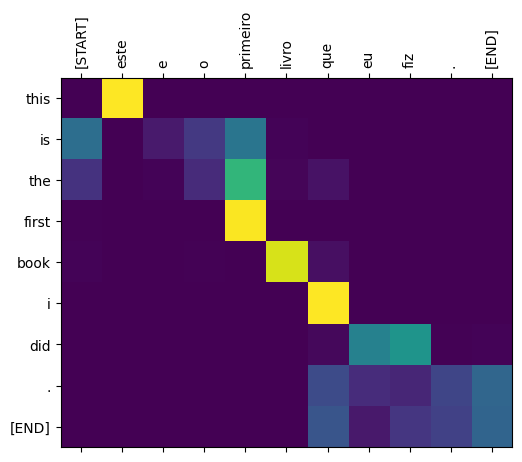

In [65]:
plot_attention_head(in_tokens, translated_tokens, attention)

In [66]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
    in_tokens = tf.convert_to_tensor([sentence])
    in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
    in_tokens = tokenizers.pt.lookup(in_tokens)[0]
    in_tokens
    
    fig = plt.figure(figsize=(16,8))
    
    for h, head in enumerate(attention_heads):
        ax = fig.add_subplot(2, 4, h+1)
        
        plot_attention_head(in_tokens, translated_tokens, head)
        
        ax.set_xlabel(f'Head {h+1}')
        
    plt.tight_layout()
    plt.show()

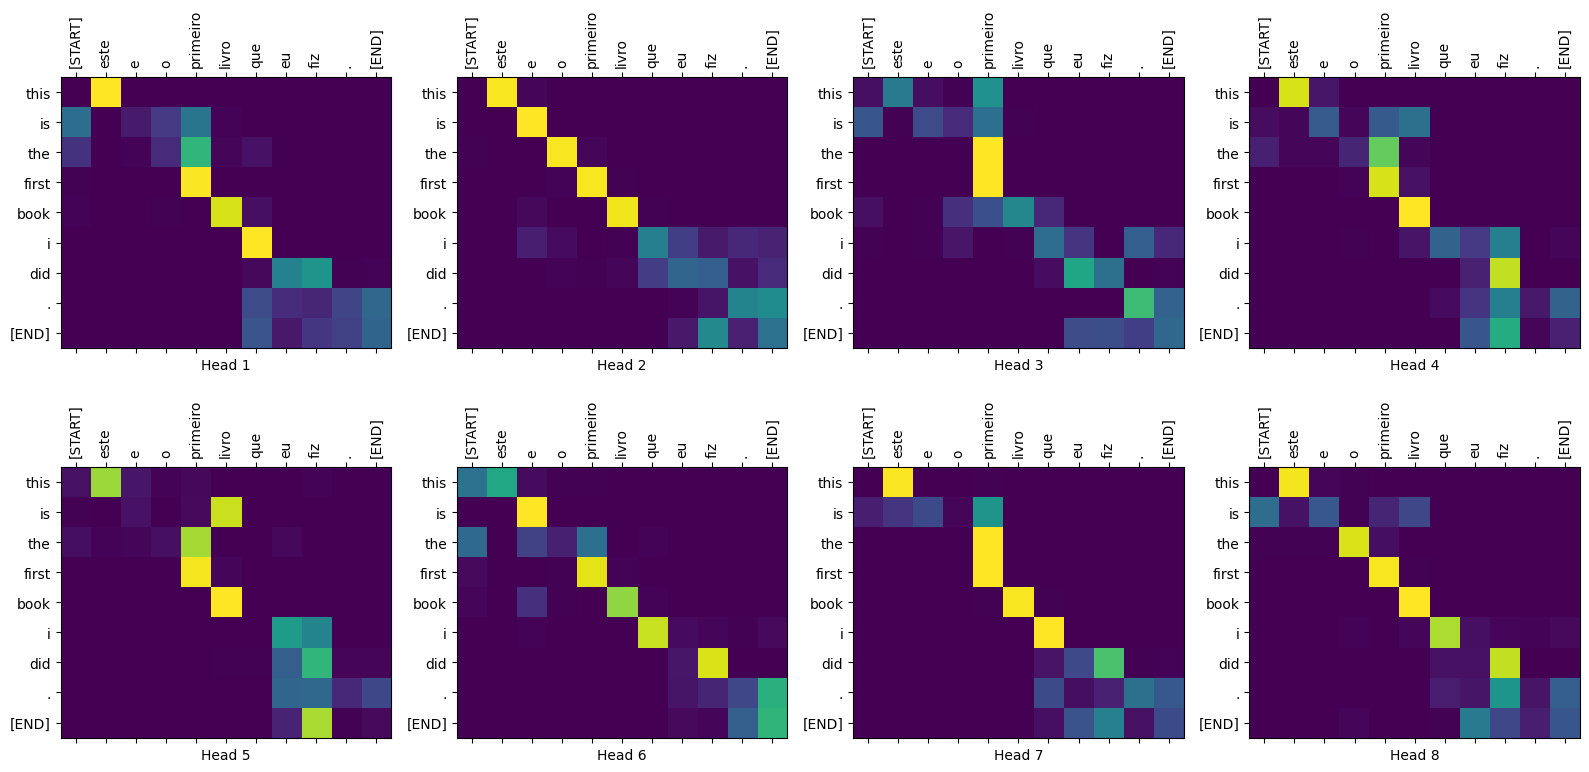

In [67]:
plot_attention_weights(sentence, translated_tokens,
                       attention_weights['decoder_layer4_block2'][0])

- 모델은 기존에 학습한 단어가 아닌 새로운 단어도 잘 처리할 수 있음 
- 예를 들어, "트리케라톱스"나 "백과사전"과 같은 단어가 입력 데이터 세트에 없더라도, 모델은 이러한 단어를 거의 올바르게 번역할 수 있도록 학습
- 이를 가능하게 하는 것은 모델이 단어의 의미나 문맥을 파악할 수 있도록 학습하기 때문

Input:         : Eu li sobre triceratops na enciclopédia.
Prediction     : i ' ve been interpropocasa and swamble .
Ground truth   : I read about triceratops in the encyclopedia.


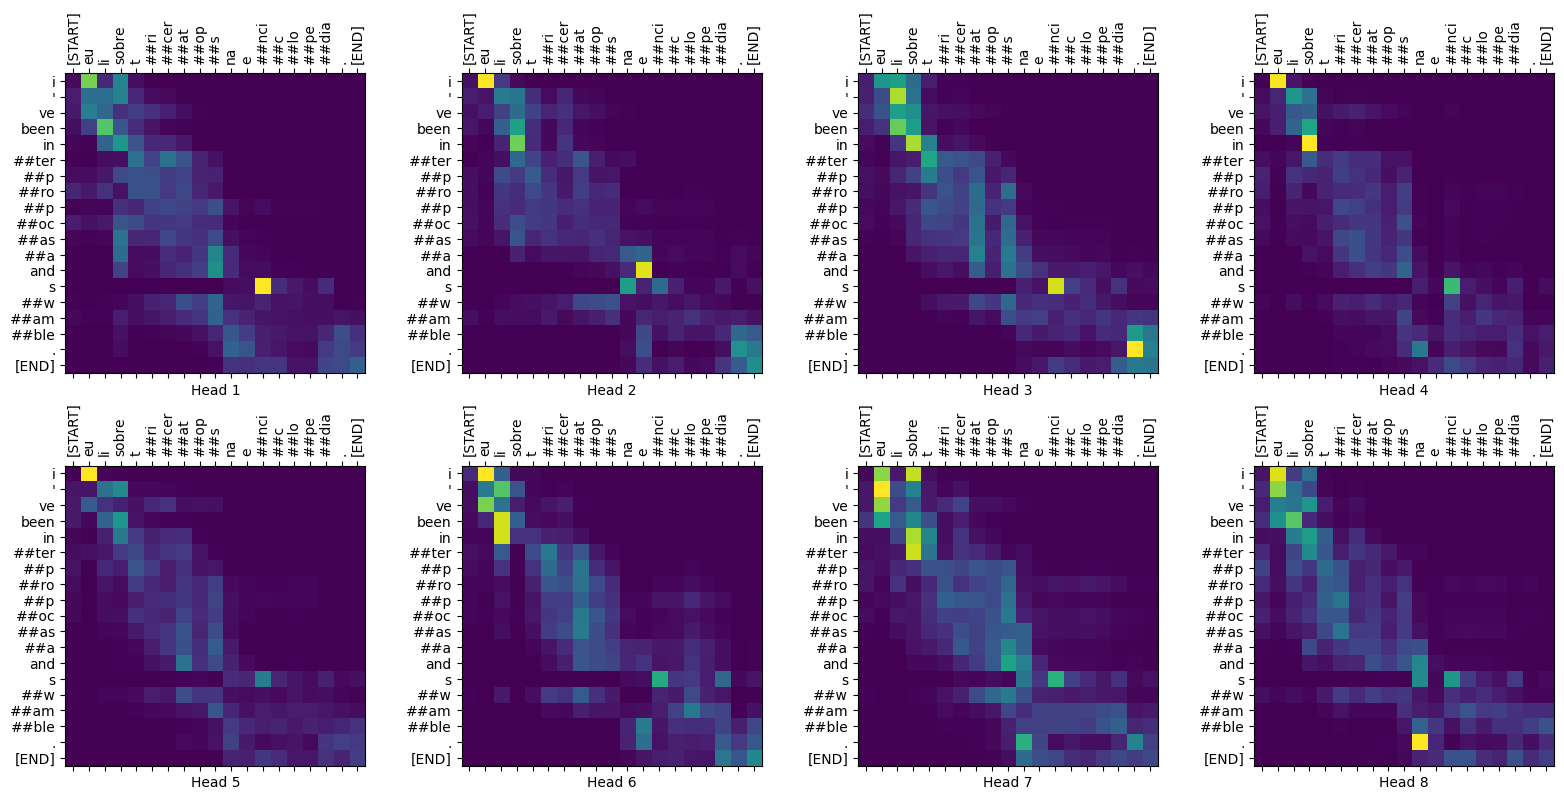

In [68]:
sentence = "Eu li sobre triceratops na enciclopédia."
ground_truth = "I read about triceratops in the encyclopedia."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens,
                       attention_weights['decoder_layer4_block2'][0])

## 모델 저장
- __call__ 메서드에 tf.function을 사용하여 또 다른 tf.Module 하위 클래스로 래핑

In [69]:
class ExportTranslator(tf.Module):
    def __init__(self, translator):
        self.translator = translator
        
    @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
    def __call__(self, sentence):
        (result,
         tokens,
         attention_weights) = self.translator(sentence, max_length=100)
        
        return result

- 위의 tf.function에서는 출력 문장만 반환되고, 불필요한 값은 계산하지 않음

In [70]:
translator = ExportTranslator(translator)

In [71]:
translator("este é o primeiro livro que eu fiz.").numpy()

b'this is the first book i did .'

In [72]:
tf.saved_model.save(translator, export_dir='translator')

In [73]:
reloaded = tf.saved_model.load('translator')
reloaded("este é o primeiro livro que eu fiz.").numpy()

b'this is the first book i did .'

- 원래 모델과 SavedModel 모델에서 다시 로드된 모델은 동일한 예측을 제공해야 함